In [14]:
import h5py as h5
import numpy as np
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import legwork

import sys
sys.path.append("../../simulation/src/")
from variations import variations
from galaxy import simulate_mw

import os

%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='serif')
fs = 20

params = {'legend.fontsize': fs,
         'axes.labelsize': fs,
         'xtick.labelsize':0.7*fs,
         'ytick.labelsize':0.7*fs}
plt.rcParams.update(params)

In [15]:
dco_colours = {"BHBH": plt.get_cmap("plasma")(0.2), 
               "BHNS": plt.get_cmap("plasma")(0.5),
               "NSNS": plt.get_cmap("plasma")(0.8)}

dco_types = ["BHBH", "BHNS", "NSNS"]
data_folder = "../../simulation/data/"
sim_folder = data_folder + "simulation/"

total_DCOs_in_MW = np.load("../../simulation/data/total_DCO_in_MW.npy")

detections = np.load("../../simulation/data/detections_4yr.npy")
detections_10yr = np.load("../../simulation/data/detections_10yr.npy")

## Floor's 5 main channels

In [16]:
channels = np.array([
    {
        "label": "other",
        "colour": "#808080"
    },
    {
        "label": "classic",
        "colour": "#118ab2"
    },
    {
        "label": "only stable",
        "colour": "#ef476f"
    },
    {
        "label": "single core CEE",
        "colour": "#ffd166"
    },
    {
        "label": "double core CEE",
        "colour": "#073b4c"
    },
])

resort_channels = [1, 2, 3, 4, 0]

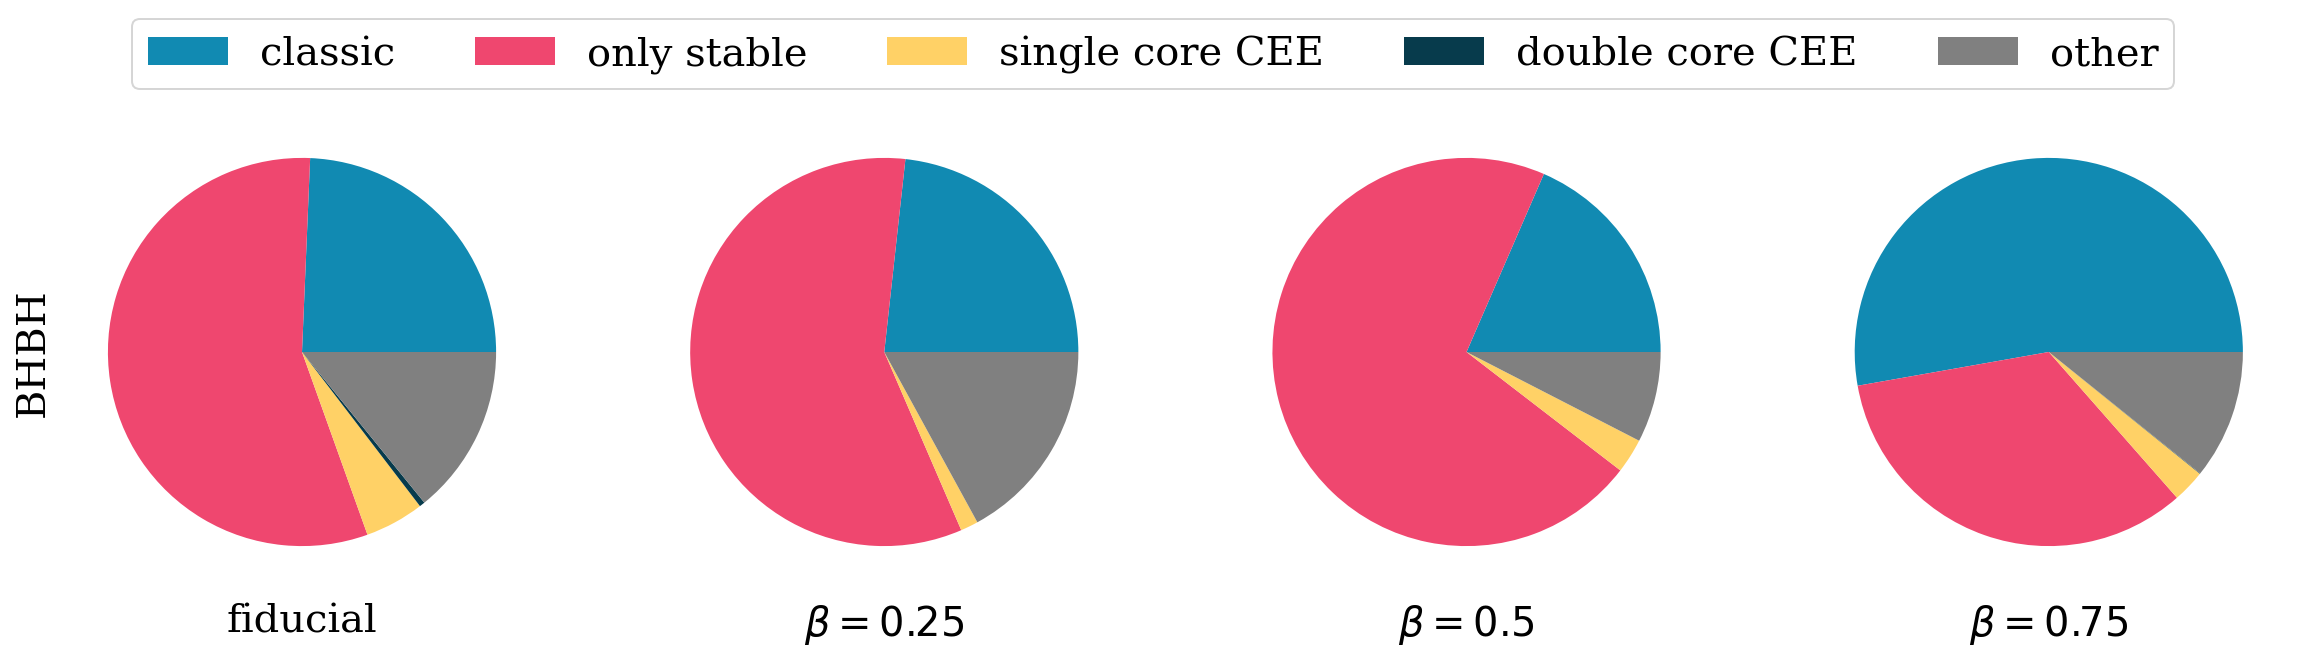

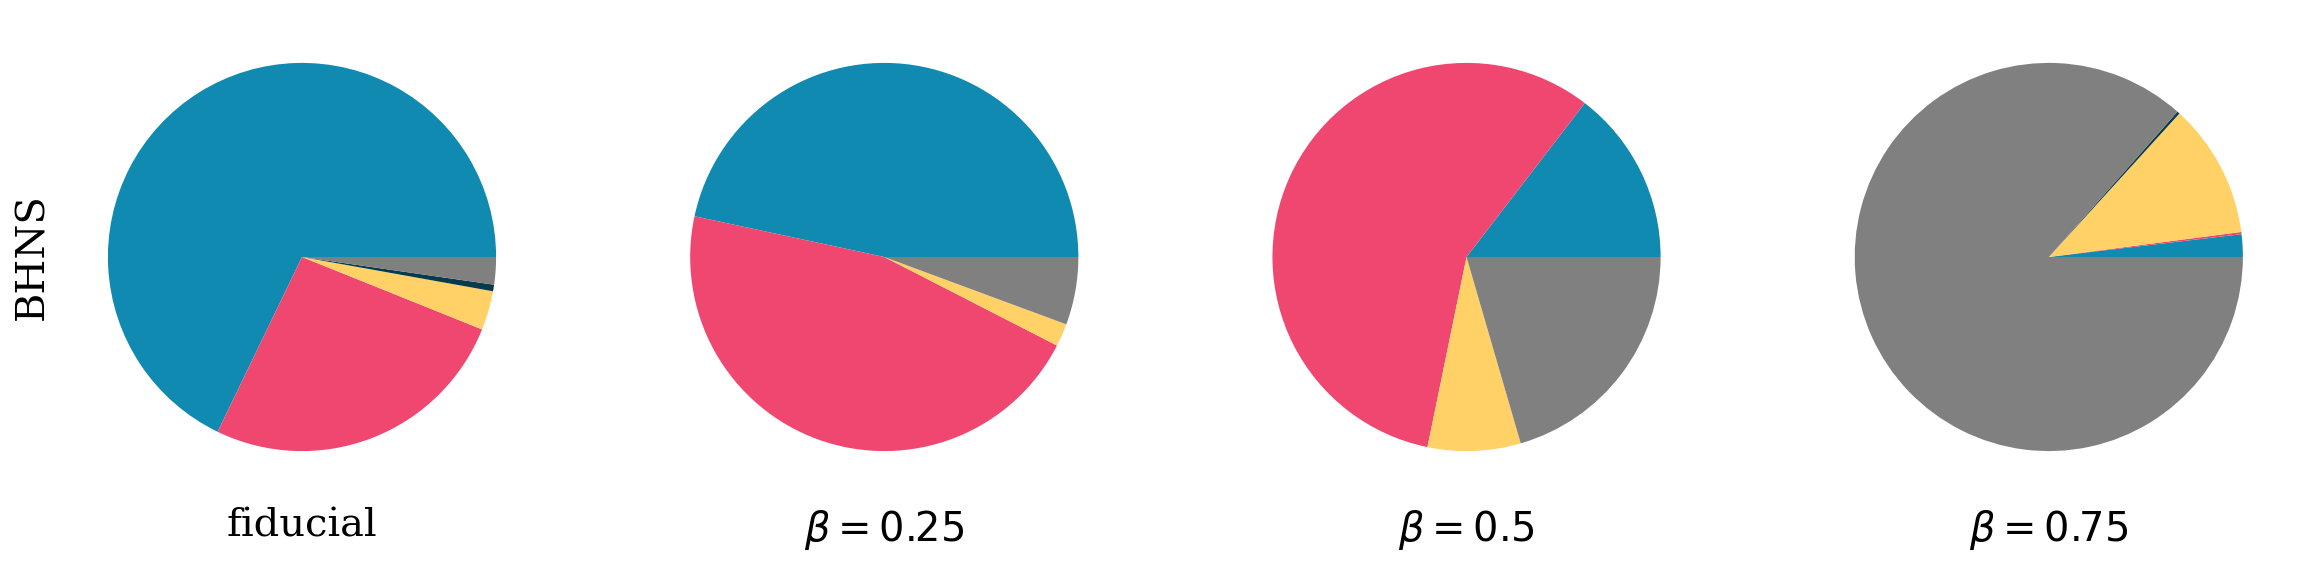

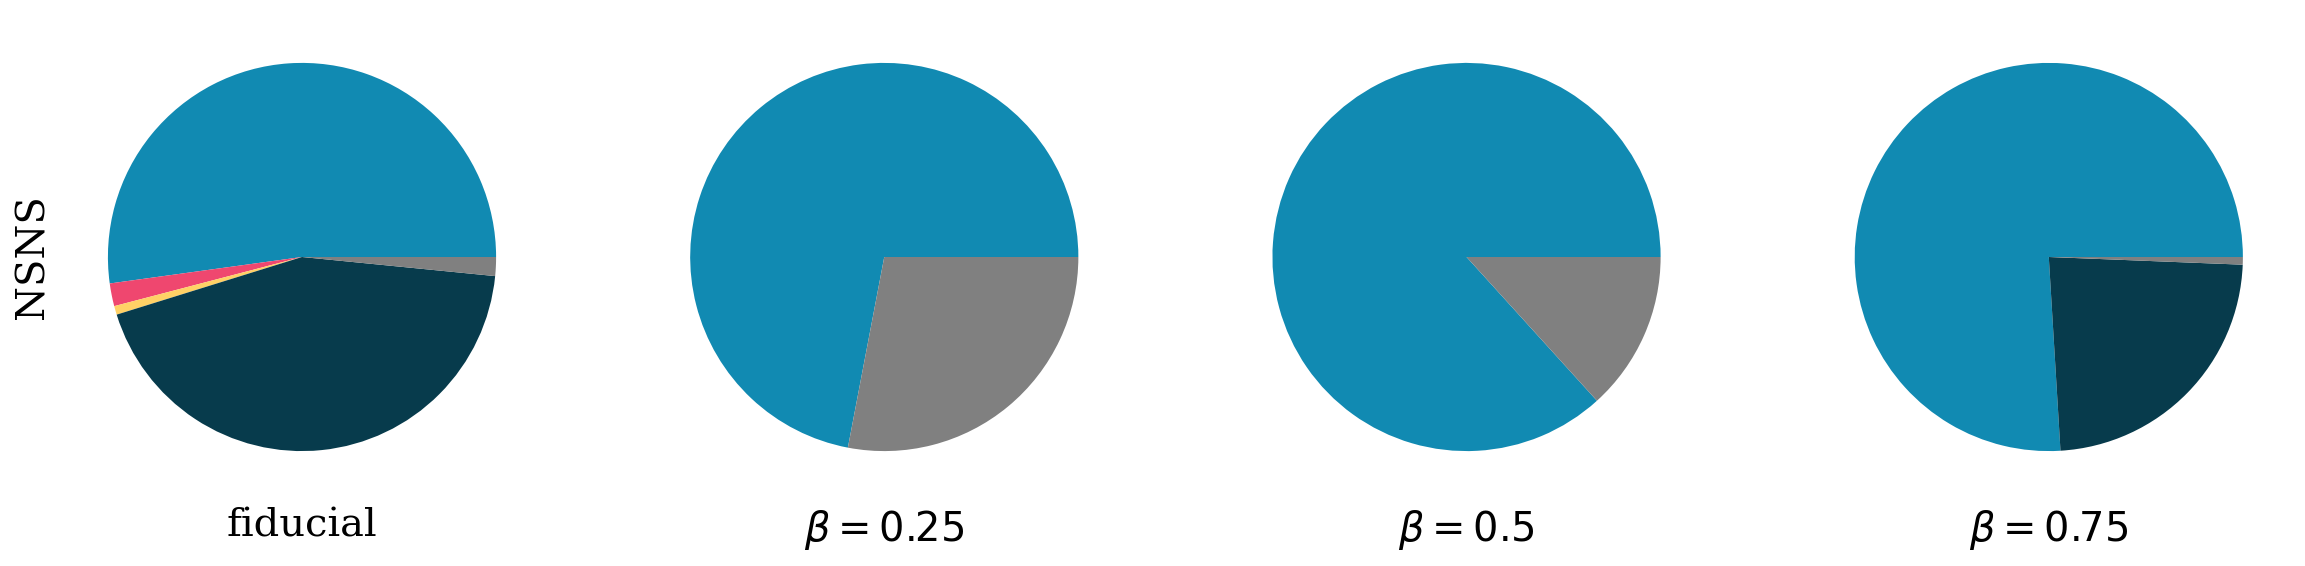

In [20]:
for dco_type in dco_types:
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    for v in range(4):
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[v]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = full_data["snr"] > 7

            data = full_data[mask]

        fractions = np.array([np.sum(data["weight"][data["channel"] == i])
                              for i in resort_channels]) / np.sum(data["weight"])
        colours = np.array([channels[c]["colour"] for c in resort_channels])
        labels = np.array([channels[c]["label"] for c in resort_channels])

        axes[v].pie(fractions, colors=colours, labels=labels, labeldistance=None, normalize=False)
        axes[v].set_xlabel(variations[v]["med"])

    axes[0].set_ylabel(dco_type)
    
    if dco_type == "BHBH":
        handles, labels = axes[-1].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', fontsize=fs, ncol=5)
    
plt.show()

fiducial
0
0.89
0.05
0.06

massTransferEfficiencyFixed_0_25
massTransferEfficiencyFixed_0_5
massTransferEfficiencyFixed_0_75
unstableCaseBB
unstableCaseBB_opt
alpha0_1
alpha0_5
alpha2_0
alpha10
optimistic
rapid
maxNSmass2_0
maxNSmass3_0
noPISN
ccSNkick_100km_s
ccSNkick_30km_s
noBHkick
wolf_rayet_multiplier_0_1
wolf_rayet_multiplier_5


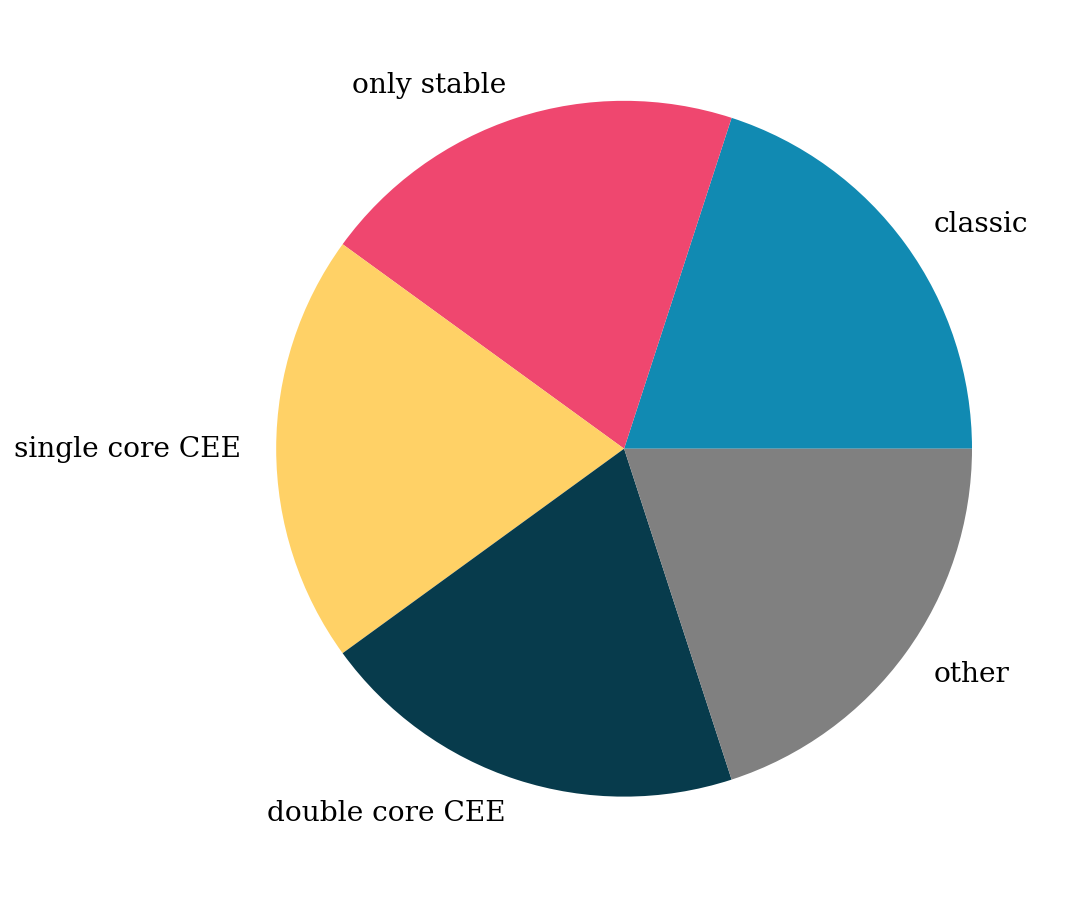

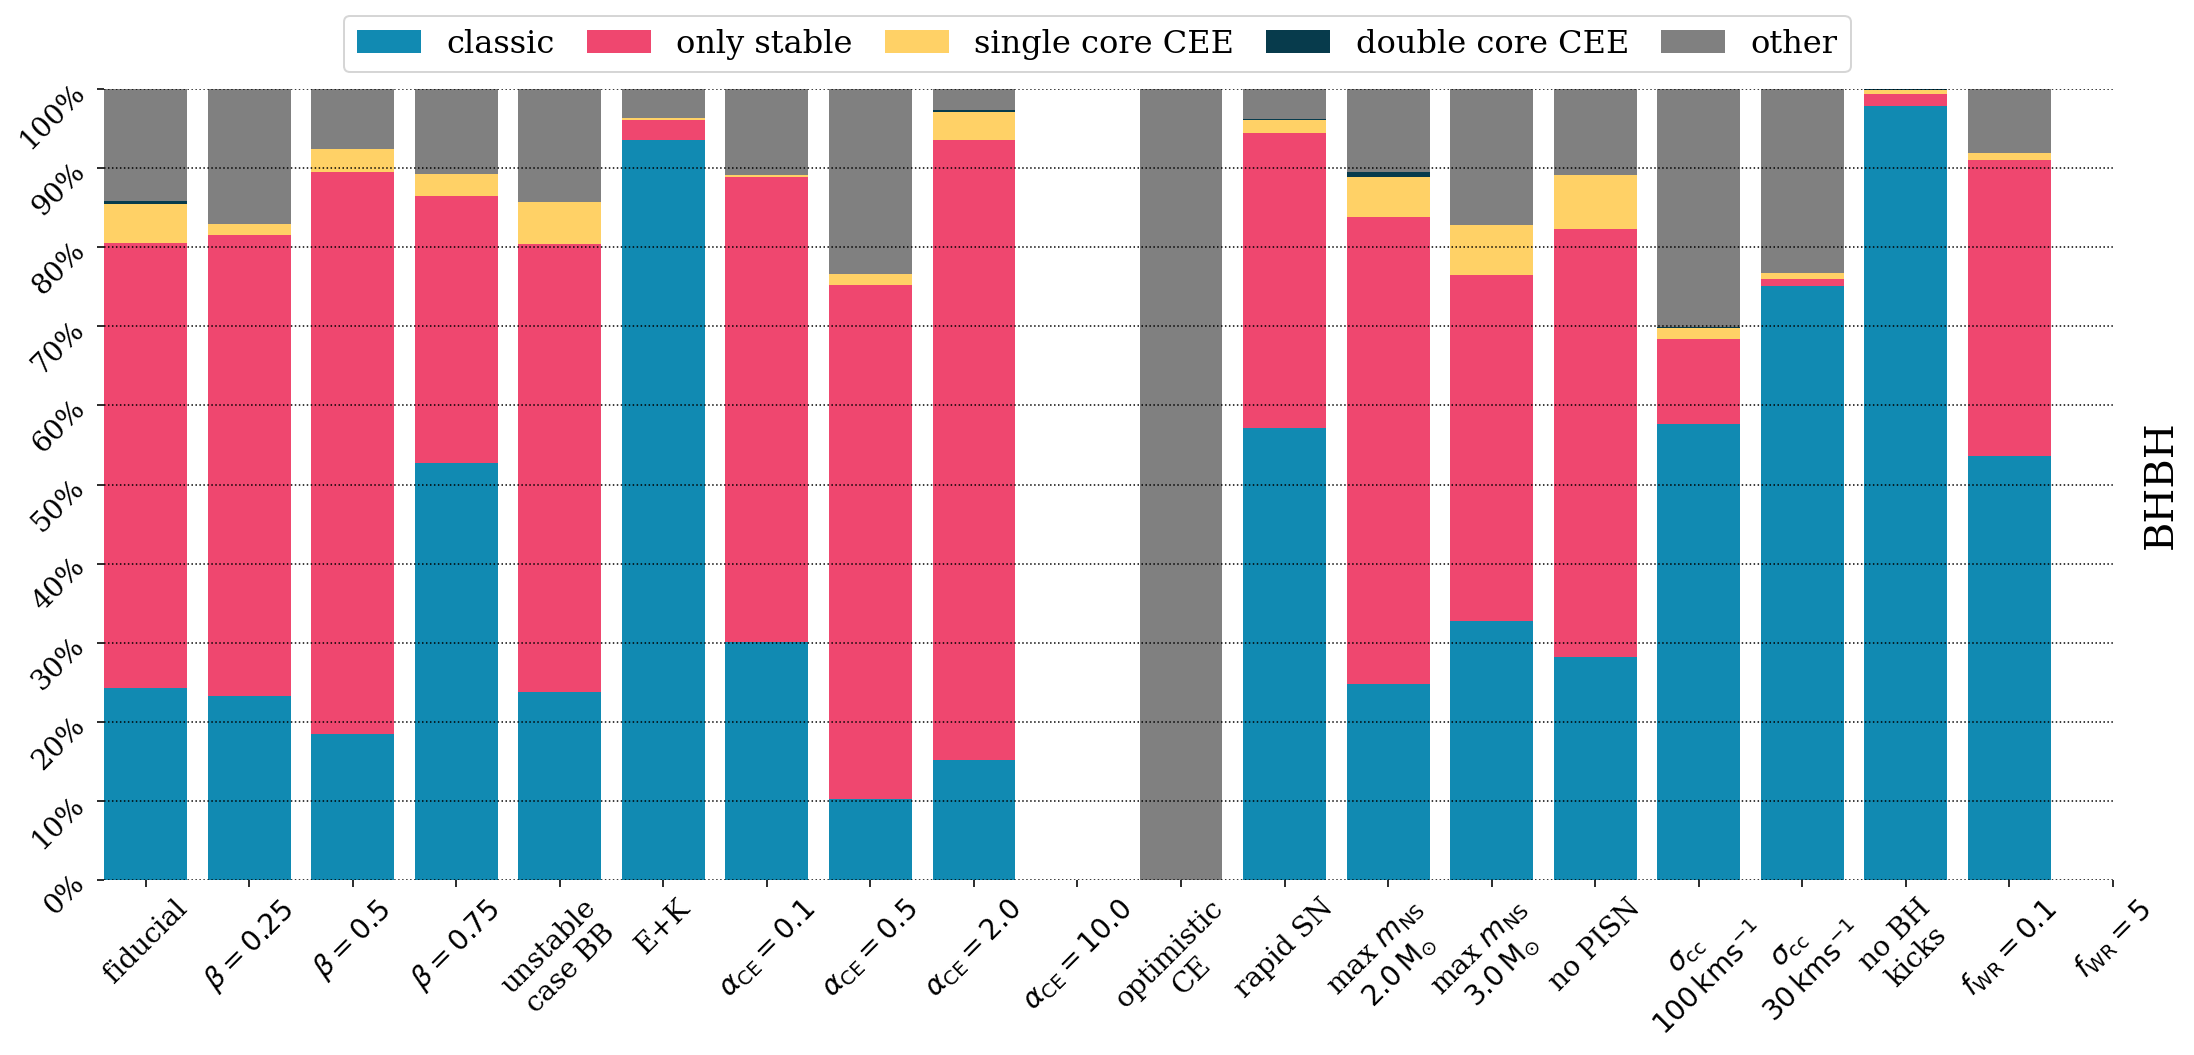

fiducial
0
0.82
0.08
0.1

massTransferEfficiencyFixed_0_25
massTransferEfficiencyFixed_0_5
massTransferEfficiencyFixed_0_75
unstableCaseBB
unstableCaseBB_opt
alpha0_1
alpha0_5
alpha2_0
alpha10
optimistic
rapid
maxNSmass2_0
maxNSmass3_0
noPISN
ccSNkick_100km_s
ccSNkick_30km_s
noBHkick
wolf_rayet_multiplier_0_1
wolf_rayet_multiplier_5


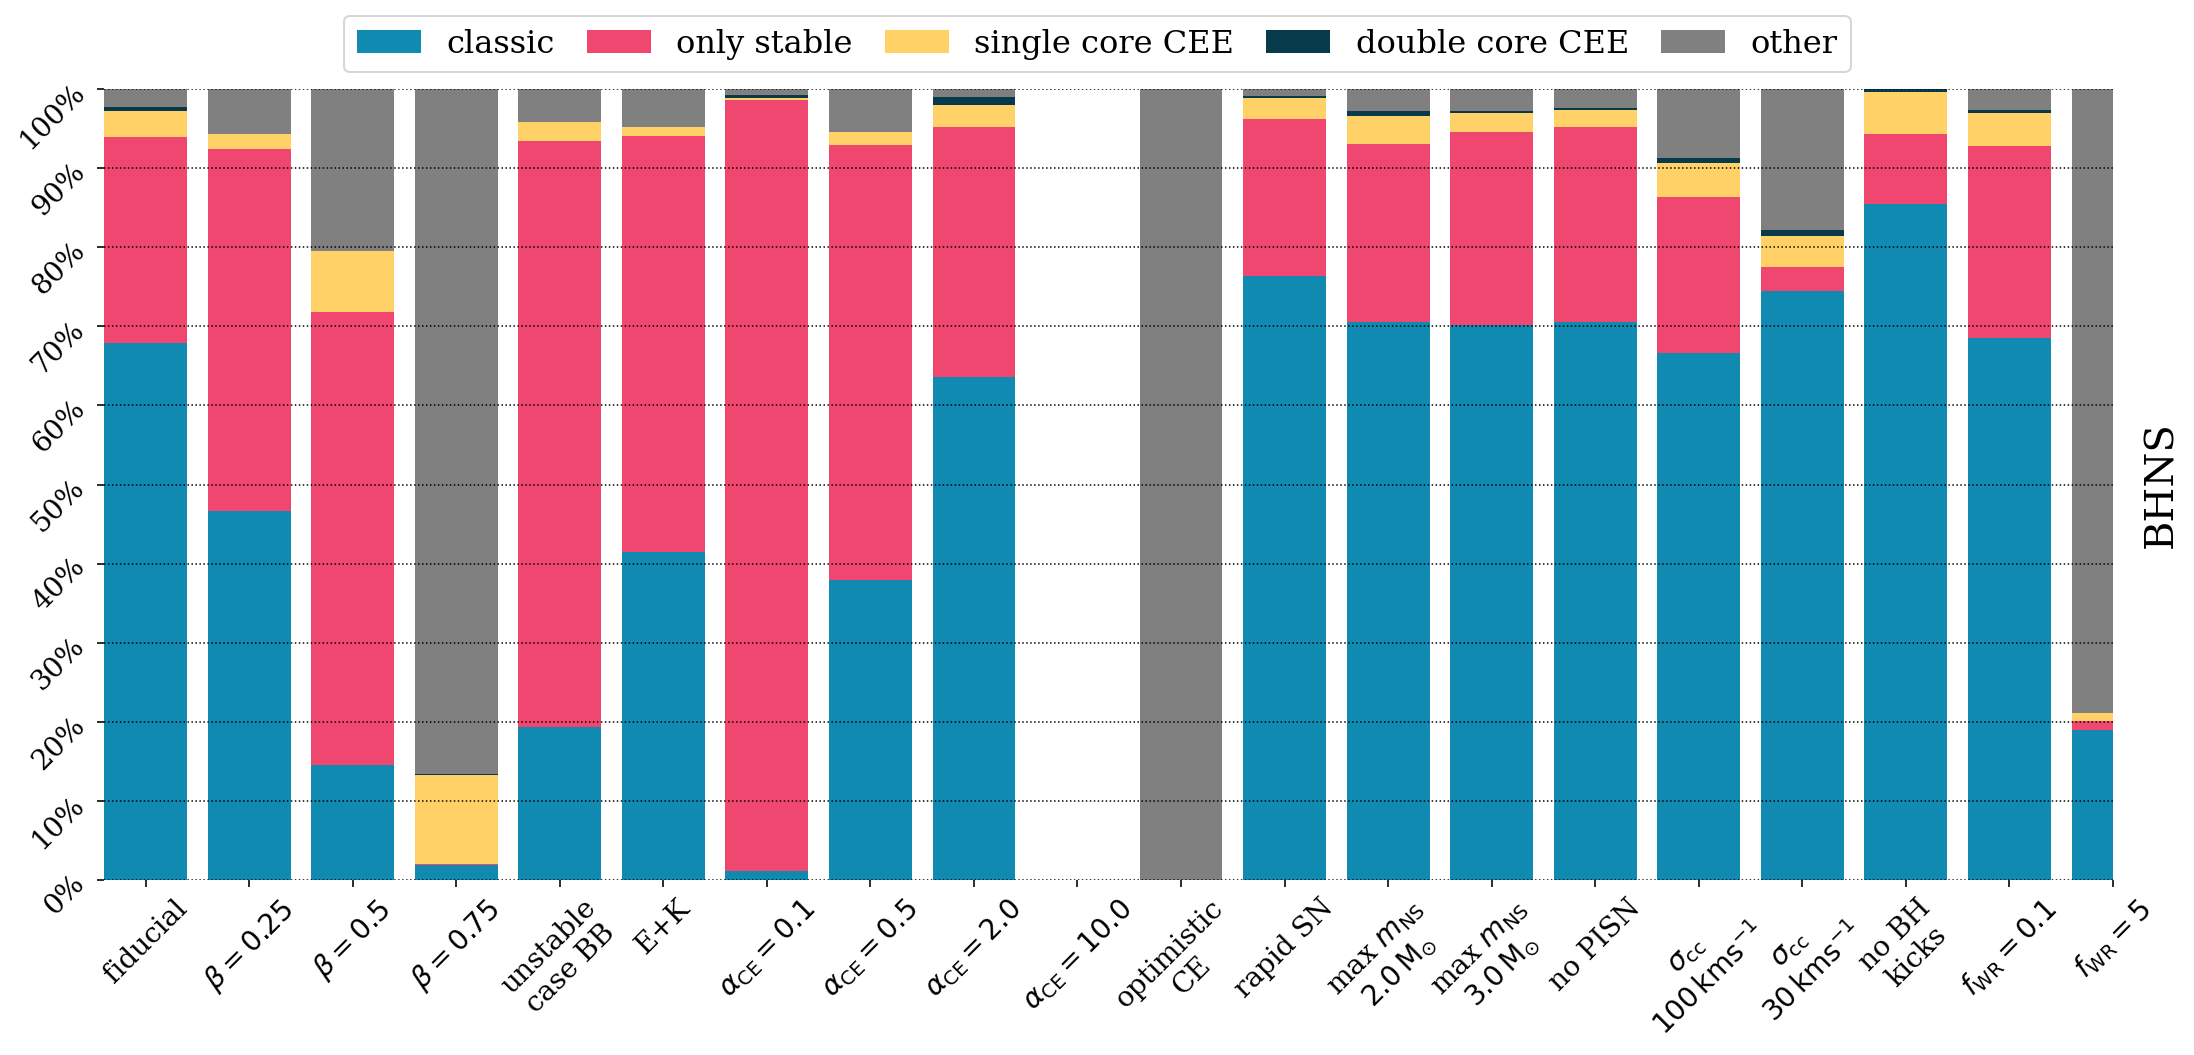

fiducial
0
0.85
0.12
0.03

massTransferEfficiencyFixed_0_25
massTransferEfficiencyFixed_0_5
massTransferEfficiencyFixed_0_75
unstableCaseBB
unstableCaseBB_opt
alpha0_1
alpha0_5
alpha2_0
alpha10
optimistic
rapid
maxNSmass2_0
maxNSmass3_0
noPISN
ccSNkick_100km_s
ccSNkick_30km_s
noBHkick
wolf_rayet_multiplier_0_1
wolf_rayet_multiplier_5


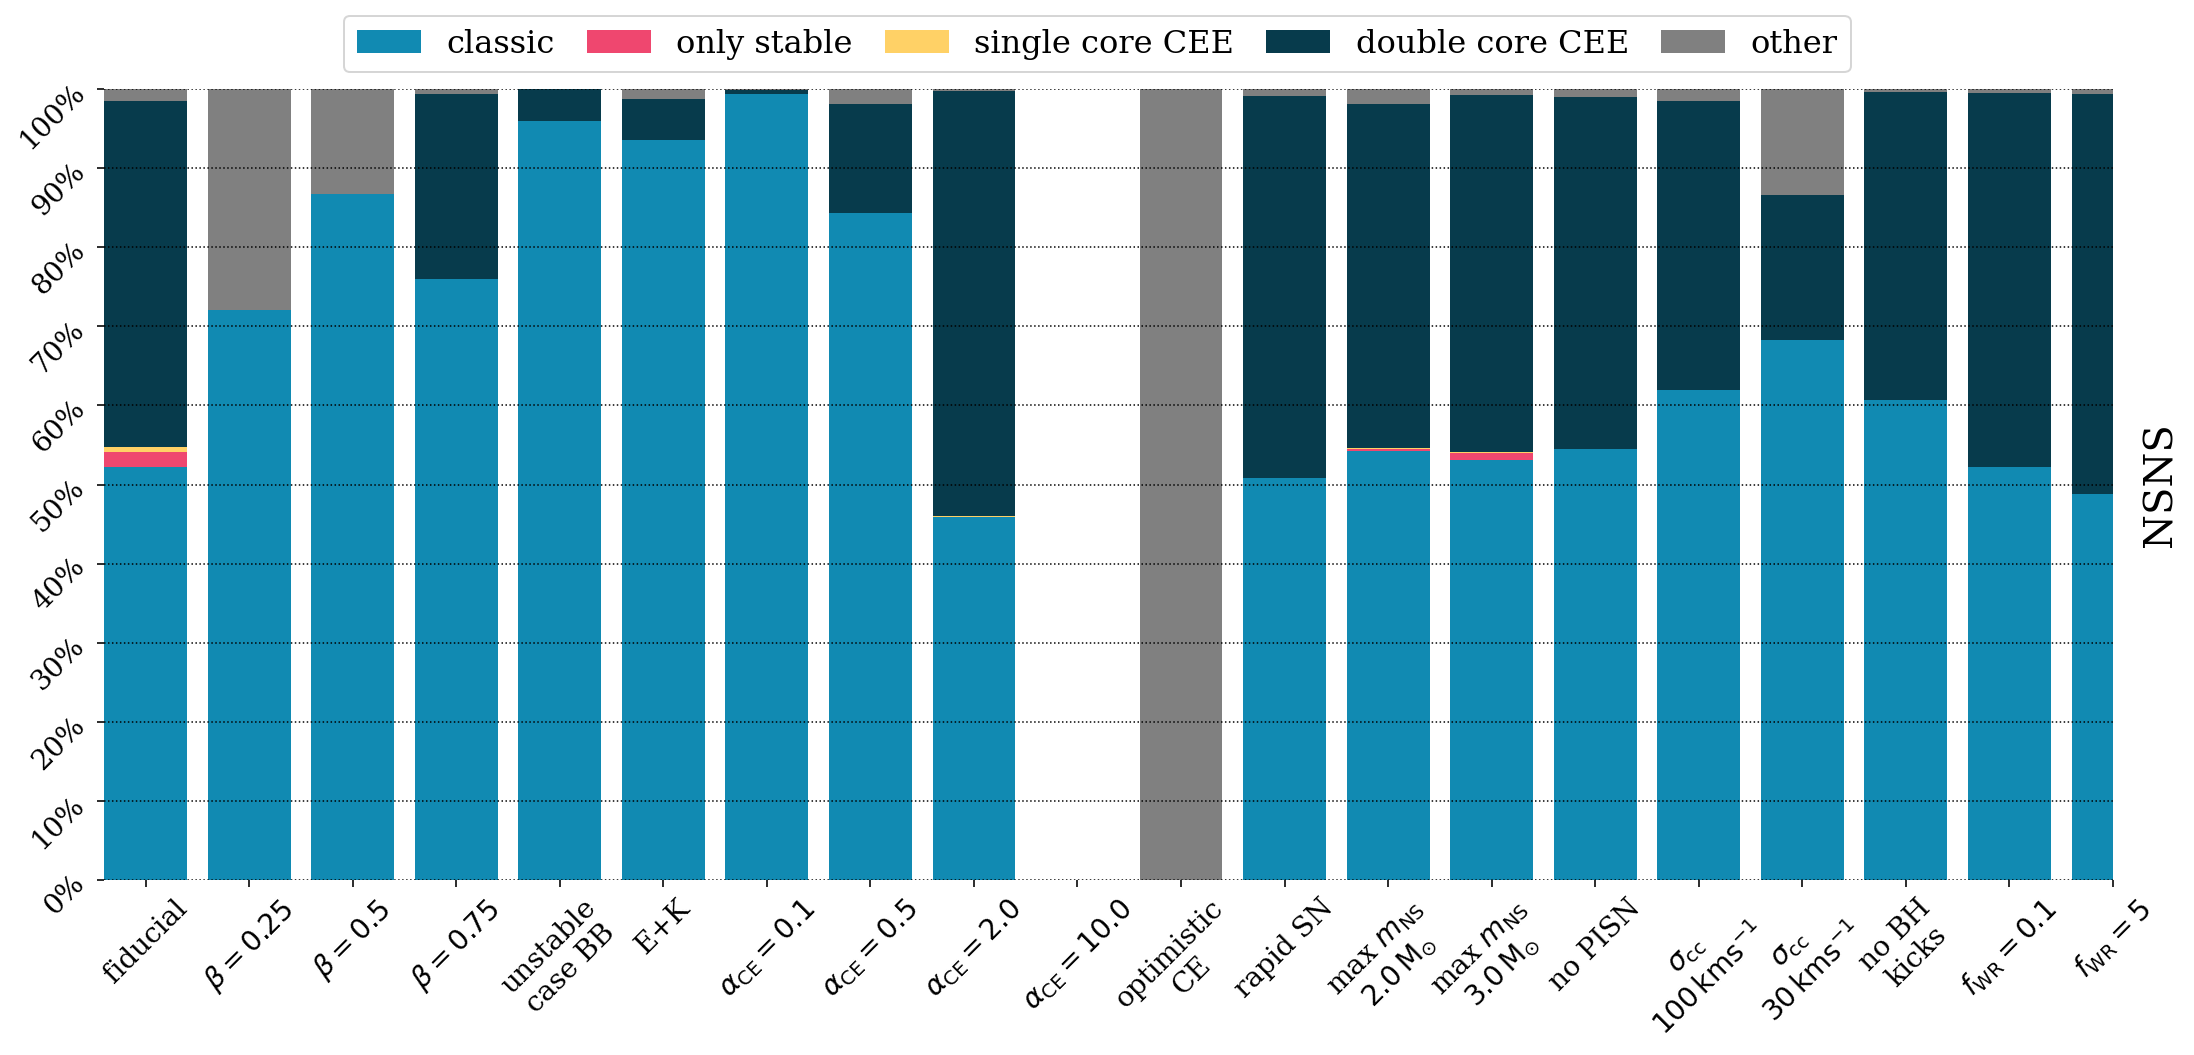

In [27]:
colours = np.array([channels[c]["colour"] for c in resort_channels])
labels = np.array([channels[c]["label"] for c in resort_channels])

fig, ax = plt.subplots()

ax.pie([0.2, 0.2, 0.2, 0.2, 0.2], colors=colours, labels=labels)

handles, leg_labels = ax.get_legend_handles_labels()

for dco_type in dco_types:
    fig, ax = plt.subplots(figsize=(18, 7))
    fig.subplots_adjust(top=0.91)
    for v in range(len(variations)):
        print(variations[v]["file"])
        if os.path.isfile(sim_folder + "{}_{}_all.h5".format(dco_type, variations[v]["file"])):
            with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[v]["file"]), "r") as f:
                full_data = f["simulation"][...].squeeze()
                mask = full_data["snr"] > 7

                data = full_data[mask]
                
            if v == 0:
                print((np.sum(data["weight"][data["component"] == 0]) / np.sum(data["weight"])).round(2))
                print((np.sum(data["weight"][data["component"] == 1]) / np.sum(data["weight"])).round(2))
                print((np.sum(data["weight"][data["component"] == 2]) / np.sum(data["weight"])).round(2))
                print()

            fractions = np.array([np.sum(data["weight"][data["channel"] == i])
                                  for i in resort_channels]) / np.sum(data["weight"])
            colours = np.array([channels[c]["colour"] for c in resort_channels])
            labels = np.array([channels[c]["label"] for c in resort_channels])

            ax.bar(x=v, height=fractions, color=colours, bottom=np.concatenate(([0], fractions.cumsum()[:-1])))
        
    ax.set_ylim(0, 1)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_yticklabels(["{:1.0f}%".format(x) for x in np.arange(0, 1.1, 0.1) * 100], rotation=45)
    
    for y in np.arange(0, 1.1, 0.1):
        ax.axhline(y, color="black", linestyle="dotted", lw=0.75)
    
    ax.set_xlim(-0.4, 14.4)
    ax.set_xticks(range(len(variations)))
    ax.set_xticklabels([variations[v]["med"] for v in range(len(variations))], rotation=45)
    
    right_ax = ax.twinx()
    right_ax.set_ylabel(dco_type, labelpad=15)
    right_ax.set_yticks([])
    
    fig.legend(handles, labels, loc='upper center', fontsize=0.8*fs, ncol=5, columnspacing=1.0)
    
    # hide the axis frame
    for axis in [ax, right_ax]:
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['left'].set_visible(False)
        
#     plt.savefig("../../paper/figures/formation_channels_{}.pdf".format(dco_type), format="pdf", bbox_inches="tight")
    
    plt.show()

## Mass transfer cases

In [167]:
MT_case_translate = np.array(["X", "A", "B", "C"])

case_list = np.array([0, 1, 2, 3])
case_labels = np.array(["{}-{}".format(a, b)
                        for a in MT_case_translate[case_list]
                        for b in MT_case_translate[case_list]])

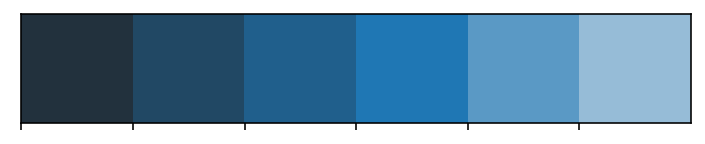

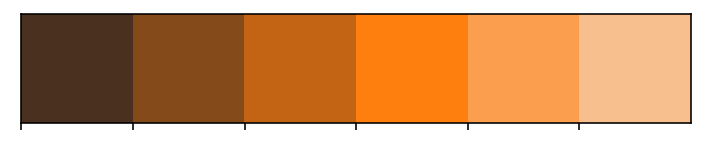

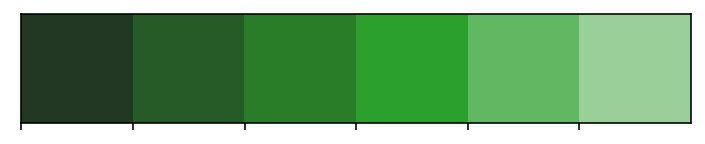

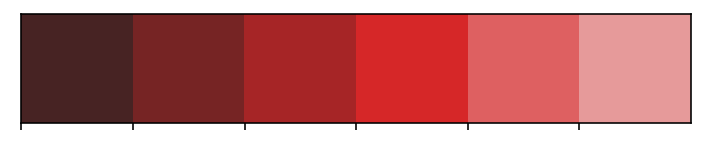

In [168]:
case_colours = np.empty(shape=(4, 6, 3), dtype="object")

maps = sns.color_palette("tab10", 4)
for i, m in enumerate(maps):
    darks = sns.dark_palette(m, 8)
    lights = sns.light_palette(m, 8, reverse=True)[1:]
    case_colours[i, :] = np.array(darks + lights)[1:-2:2]
    sns.palplot(case_colours[i, :])
    
case_colours = case_colours[:, 1:, :]

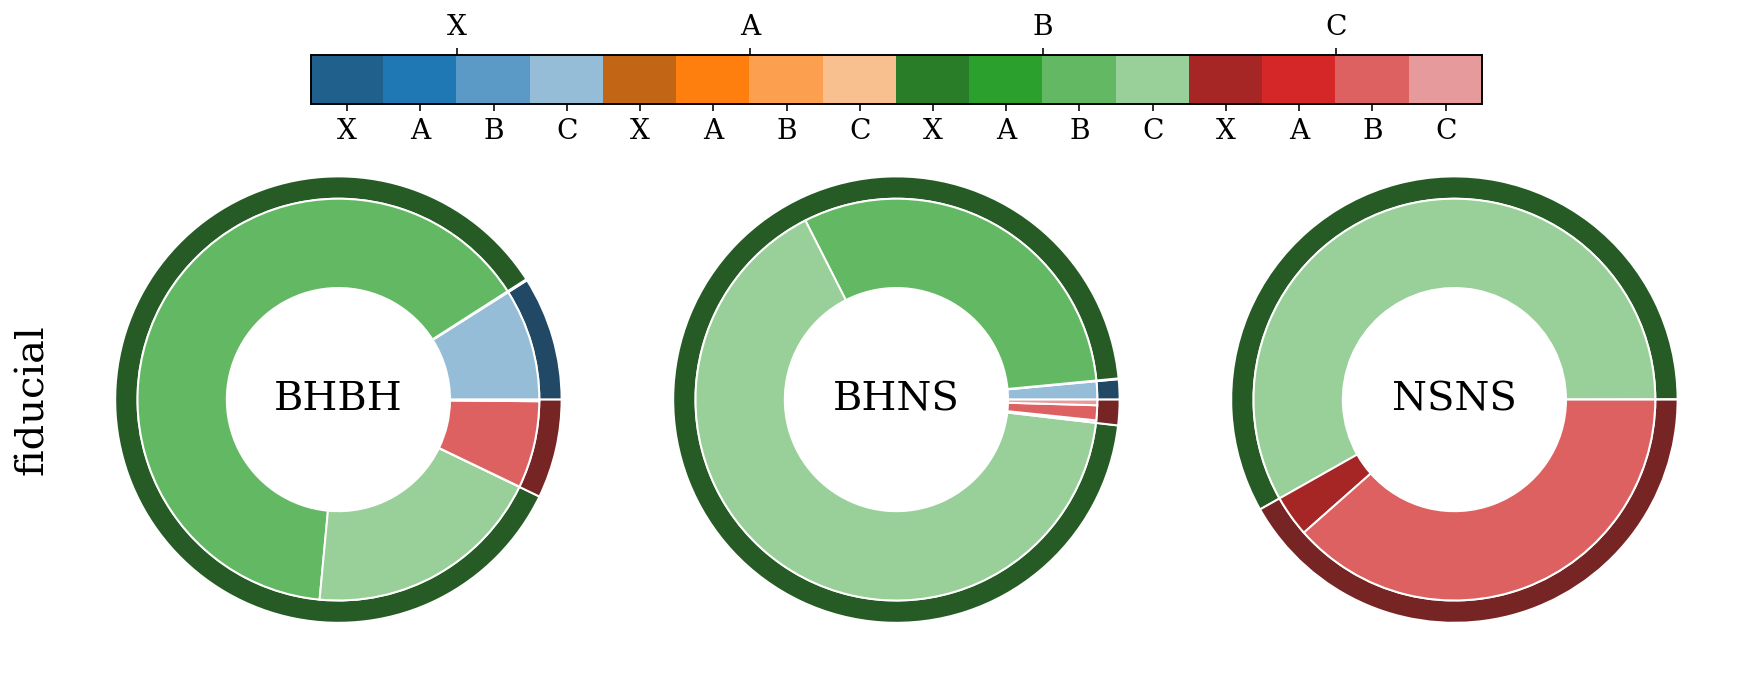

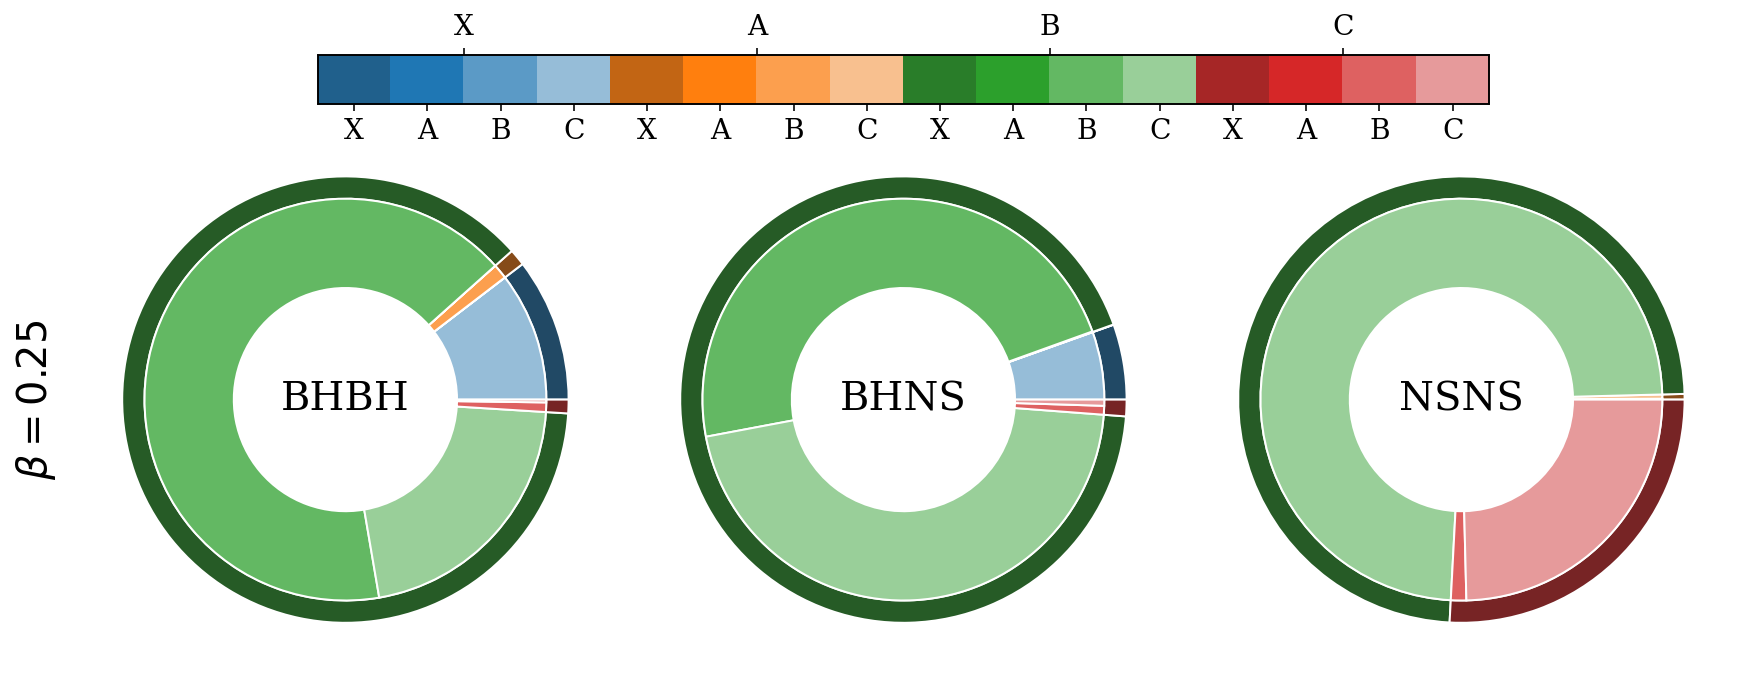

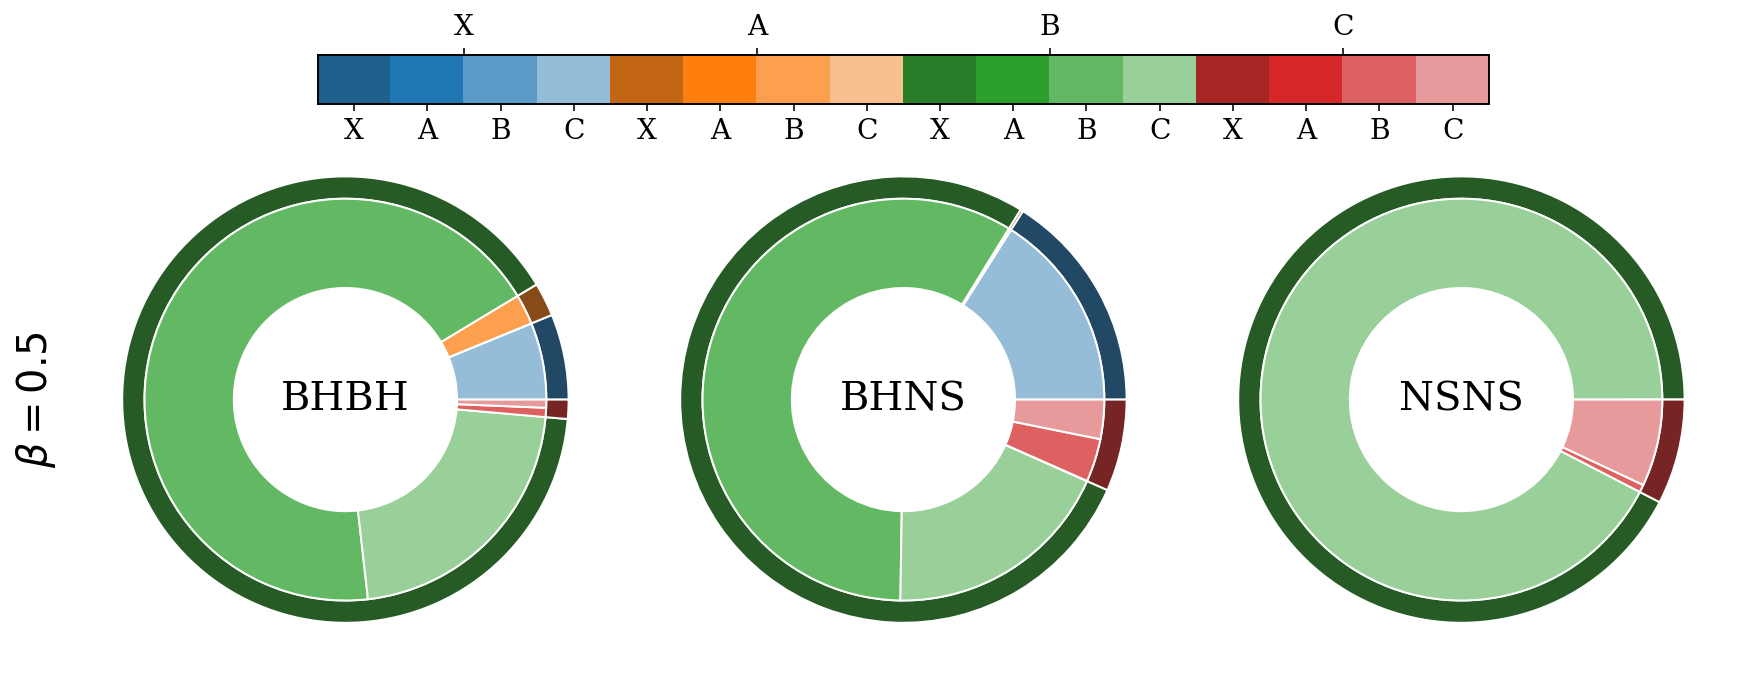

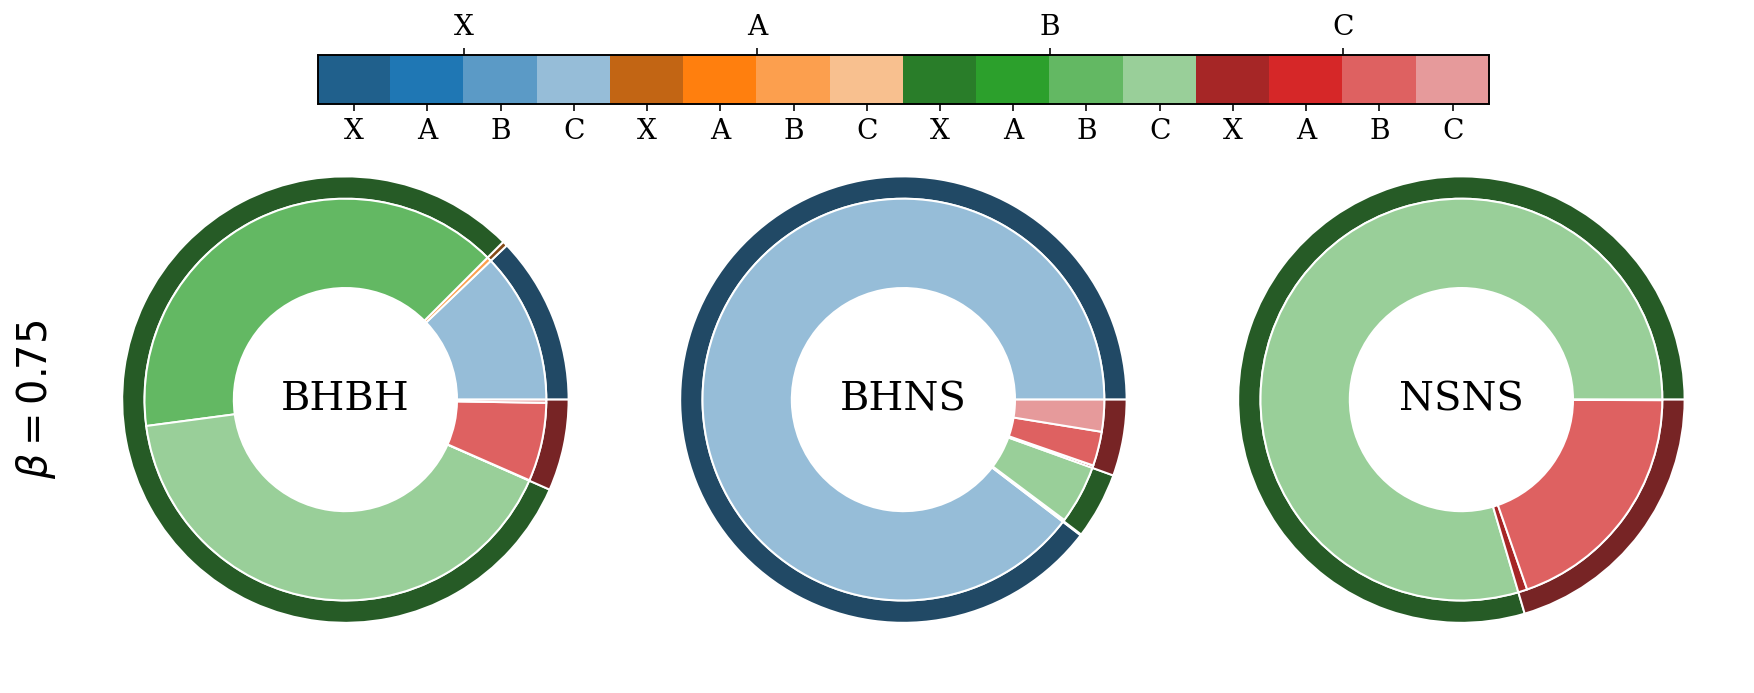

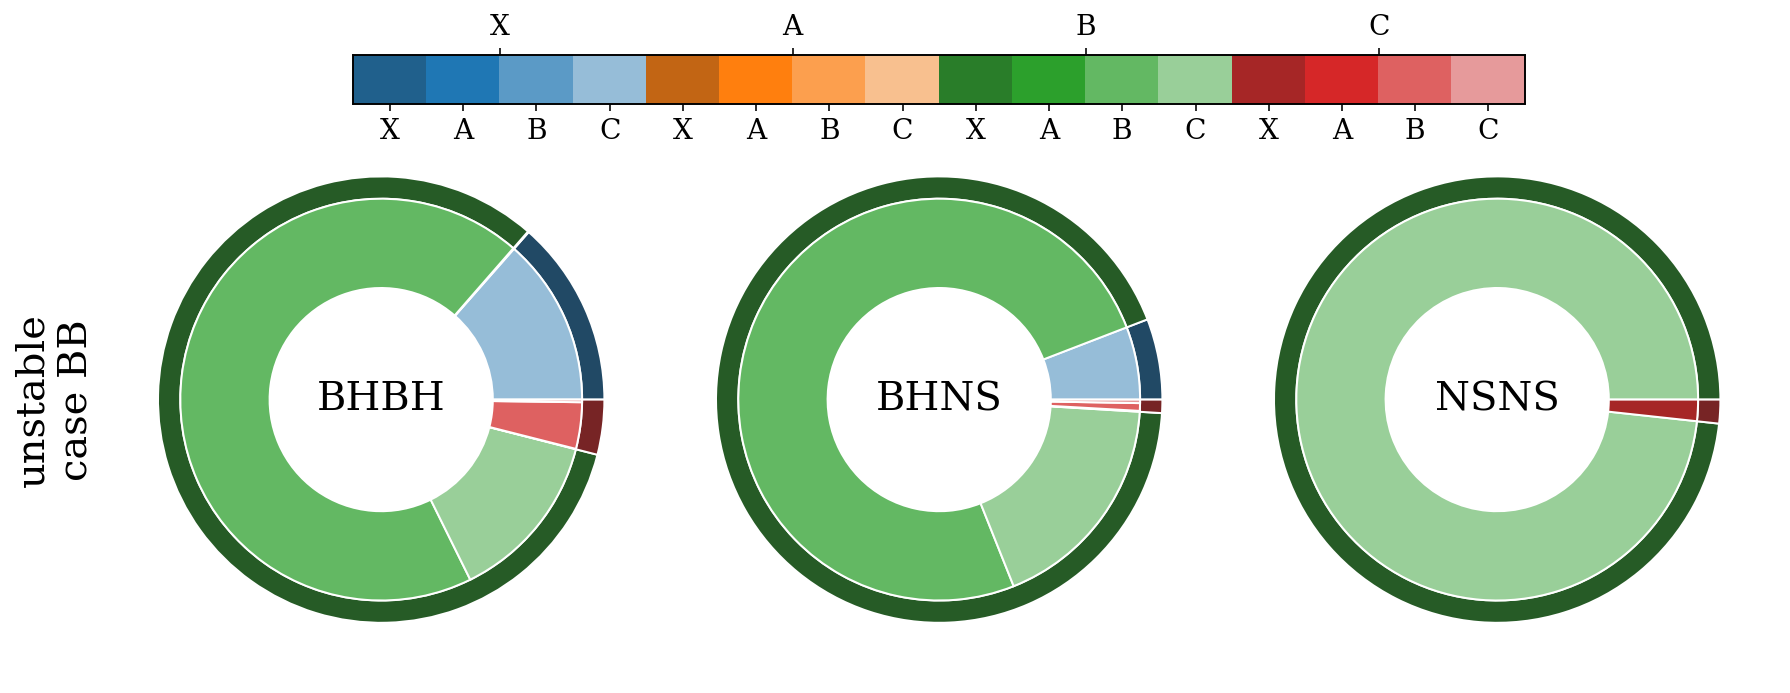

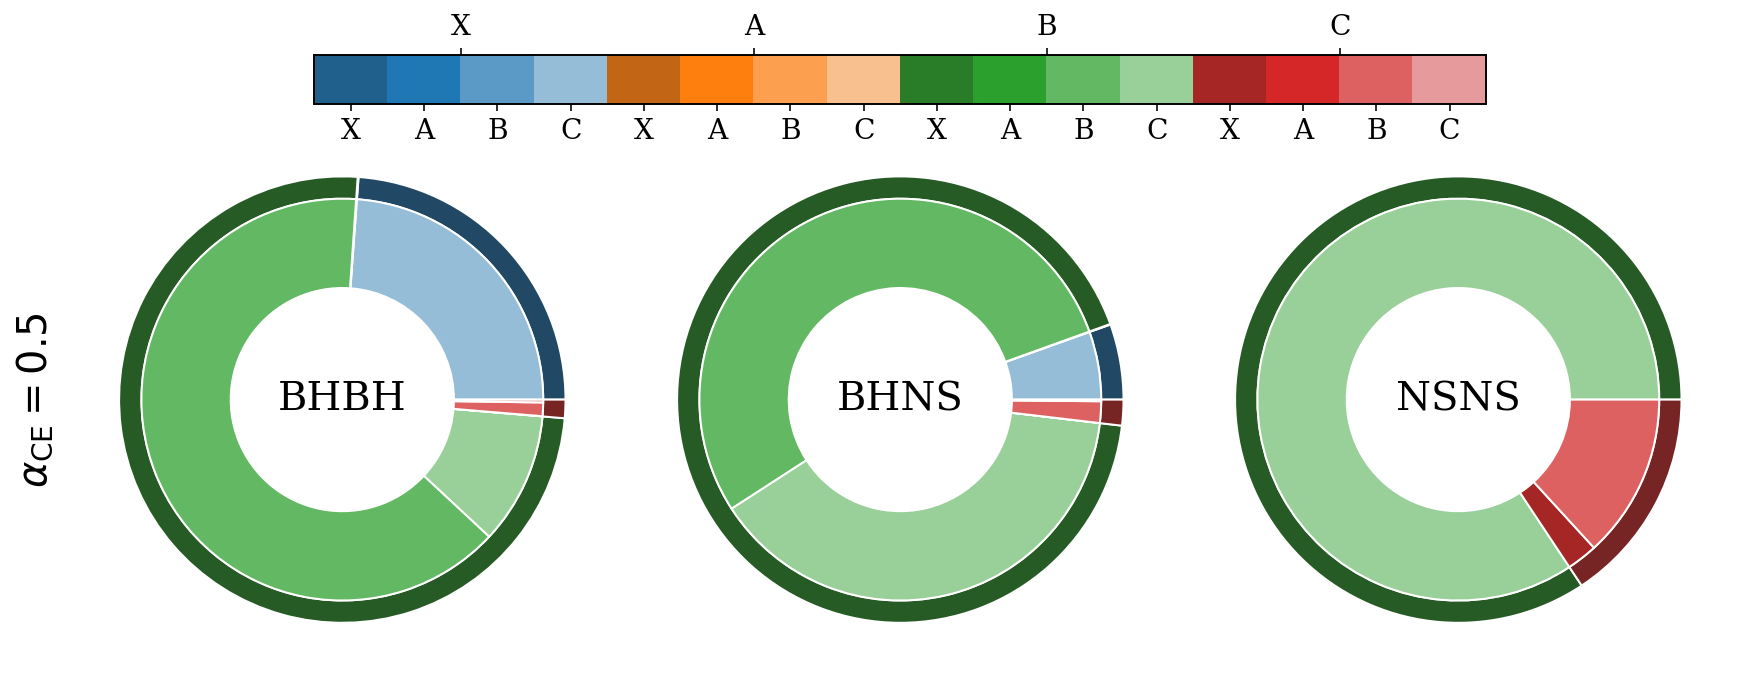

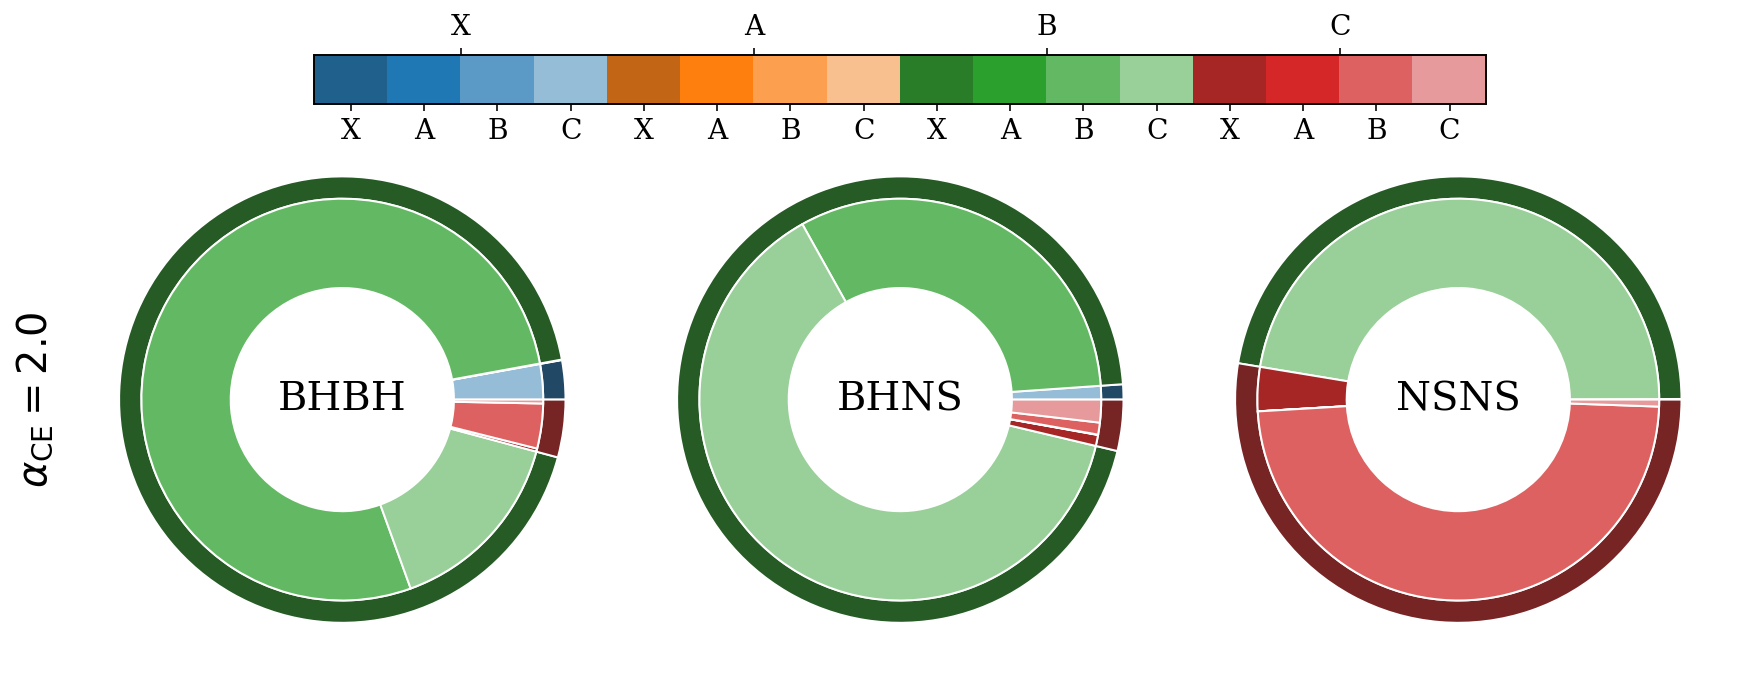

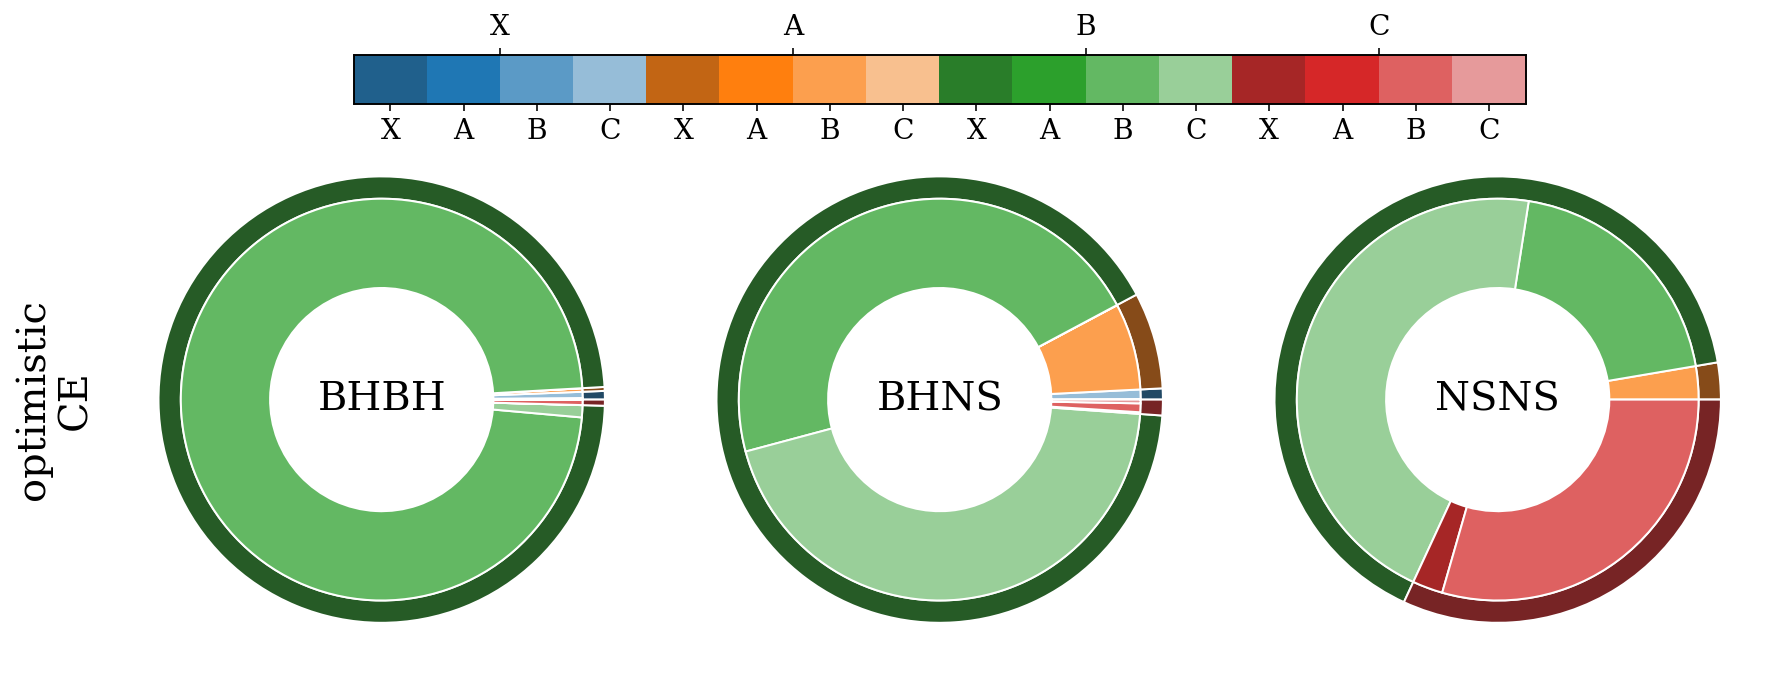

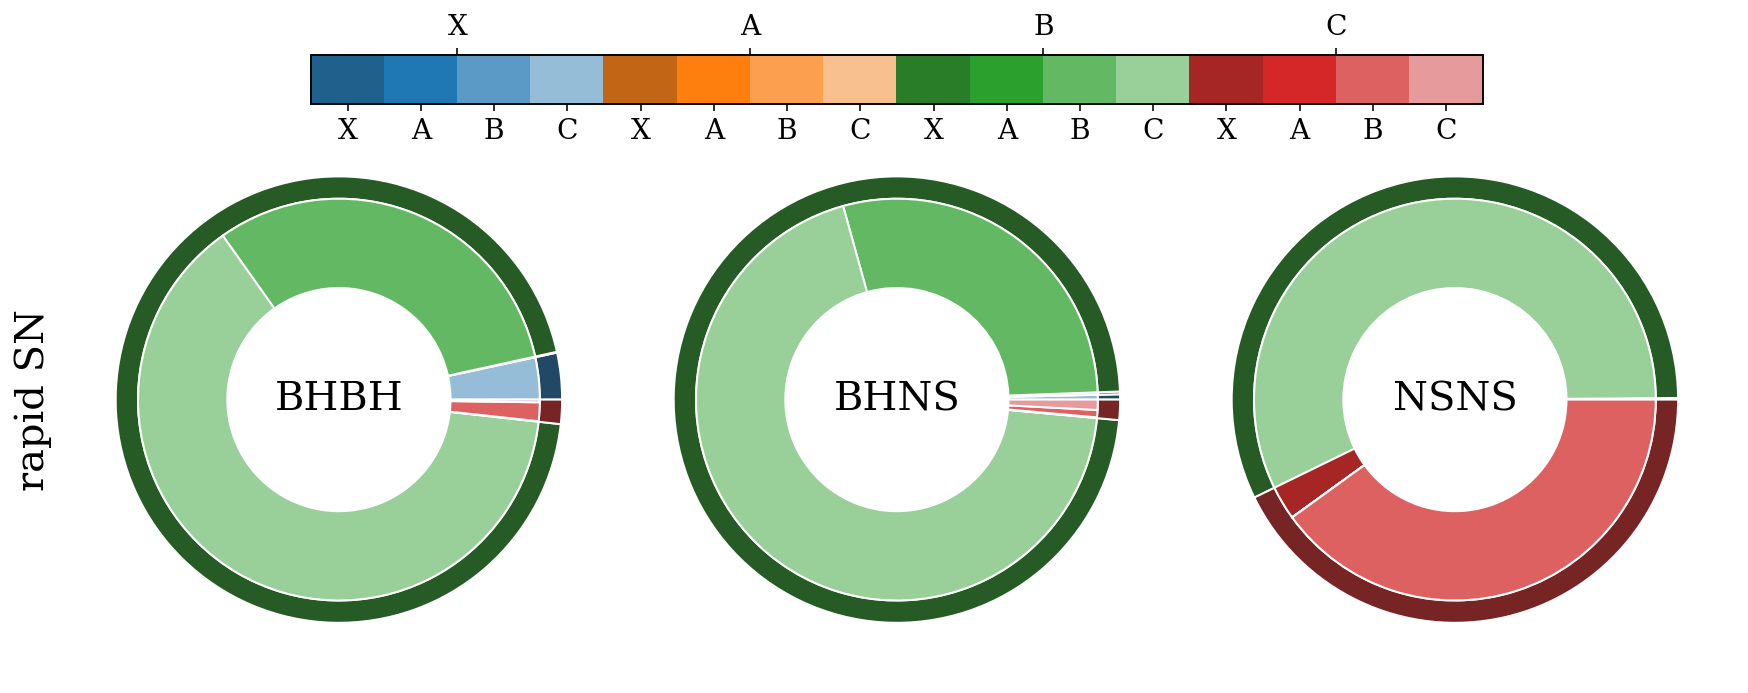

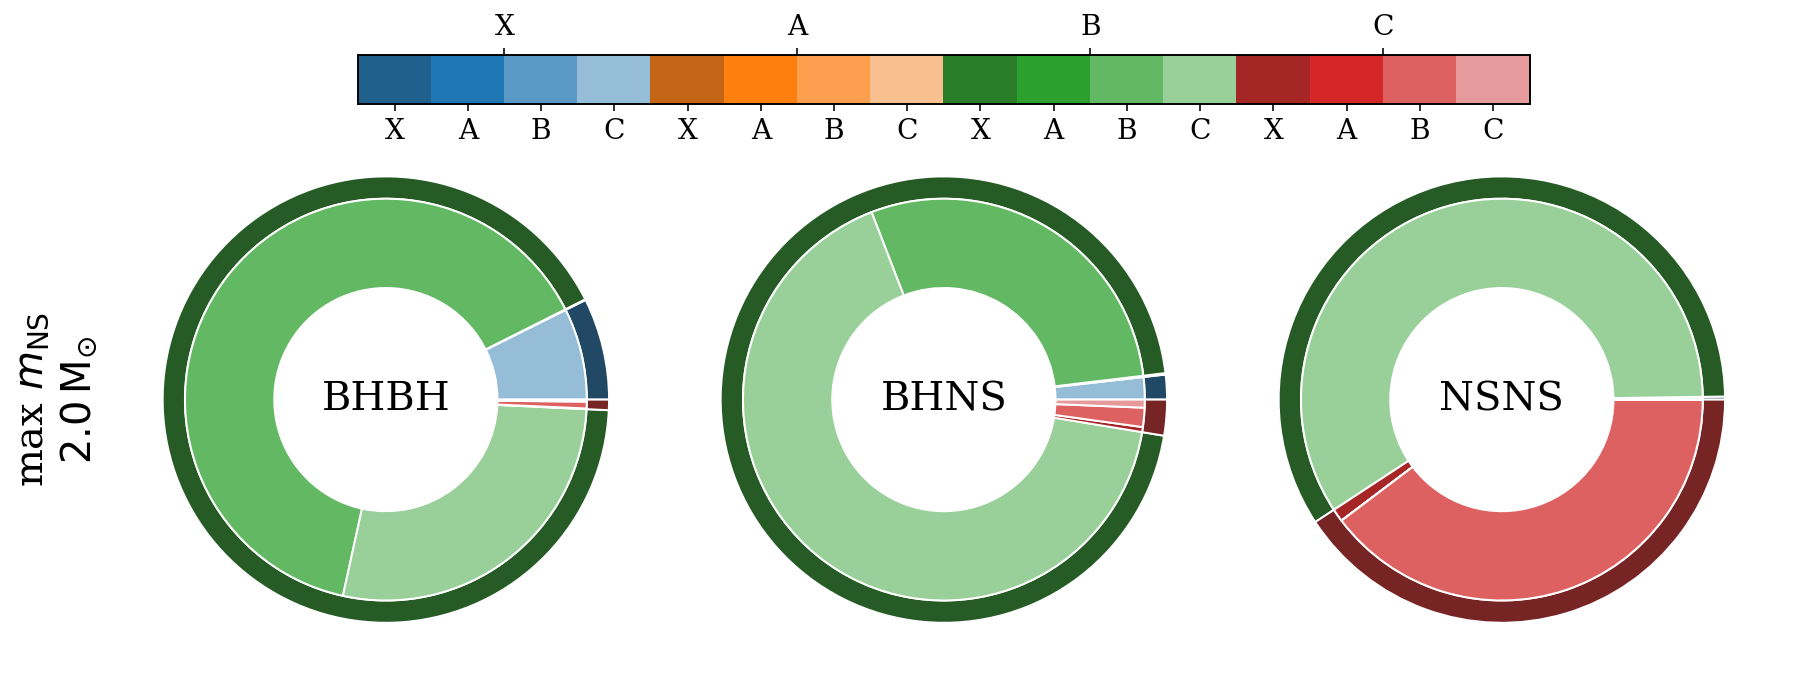

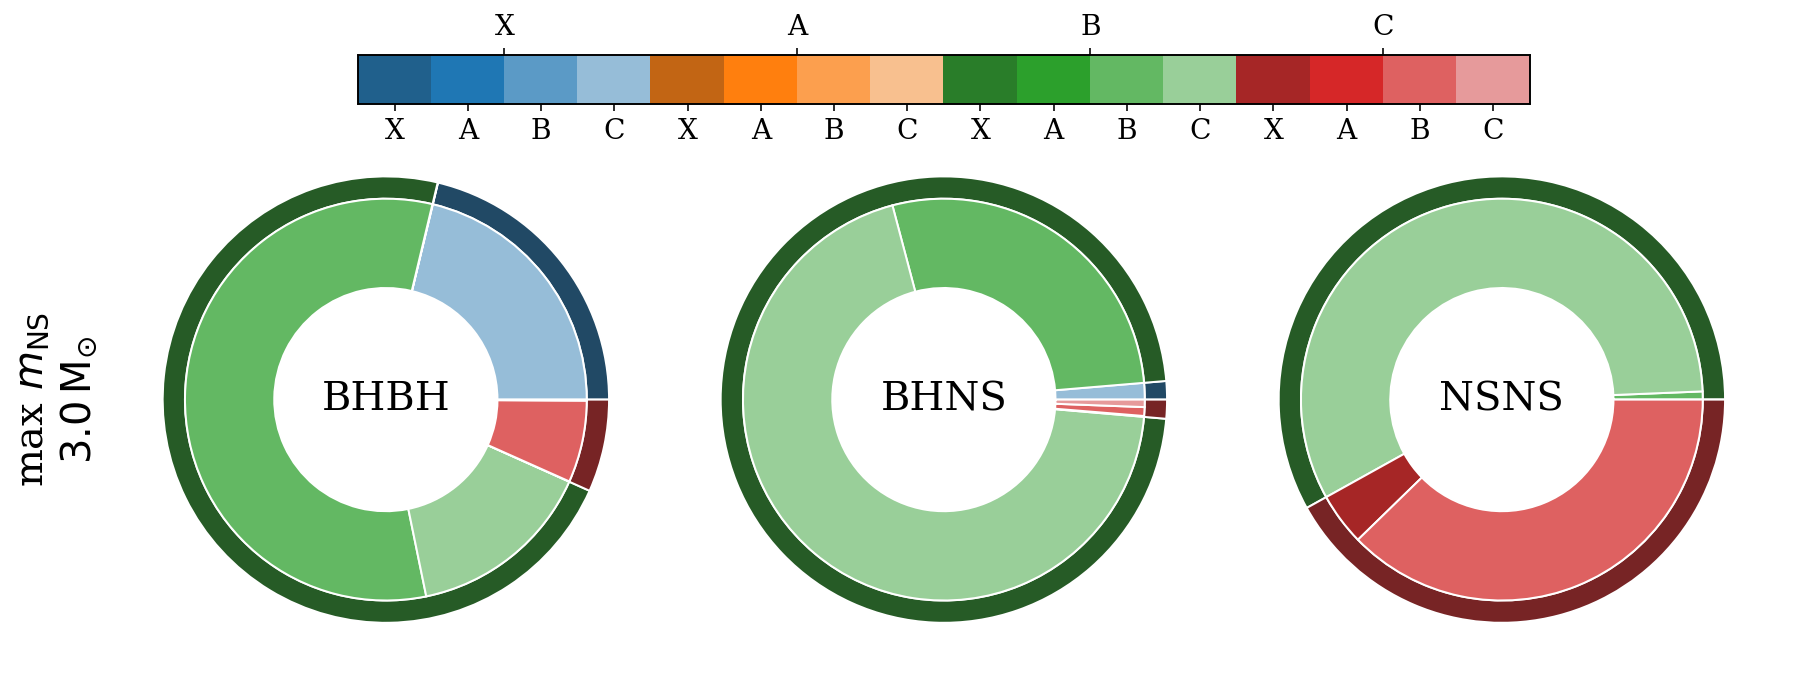

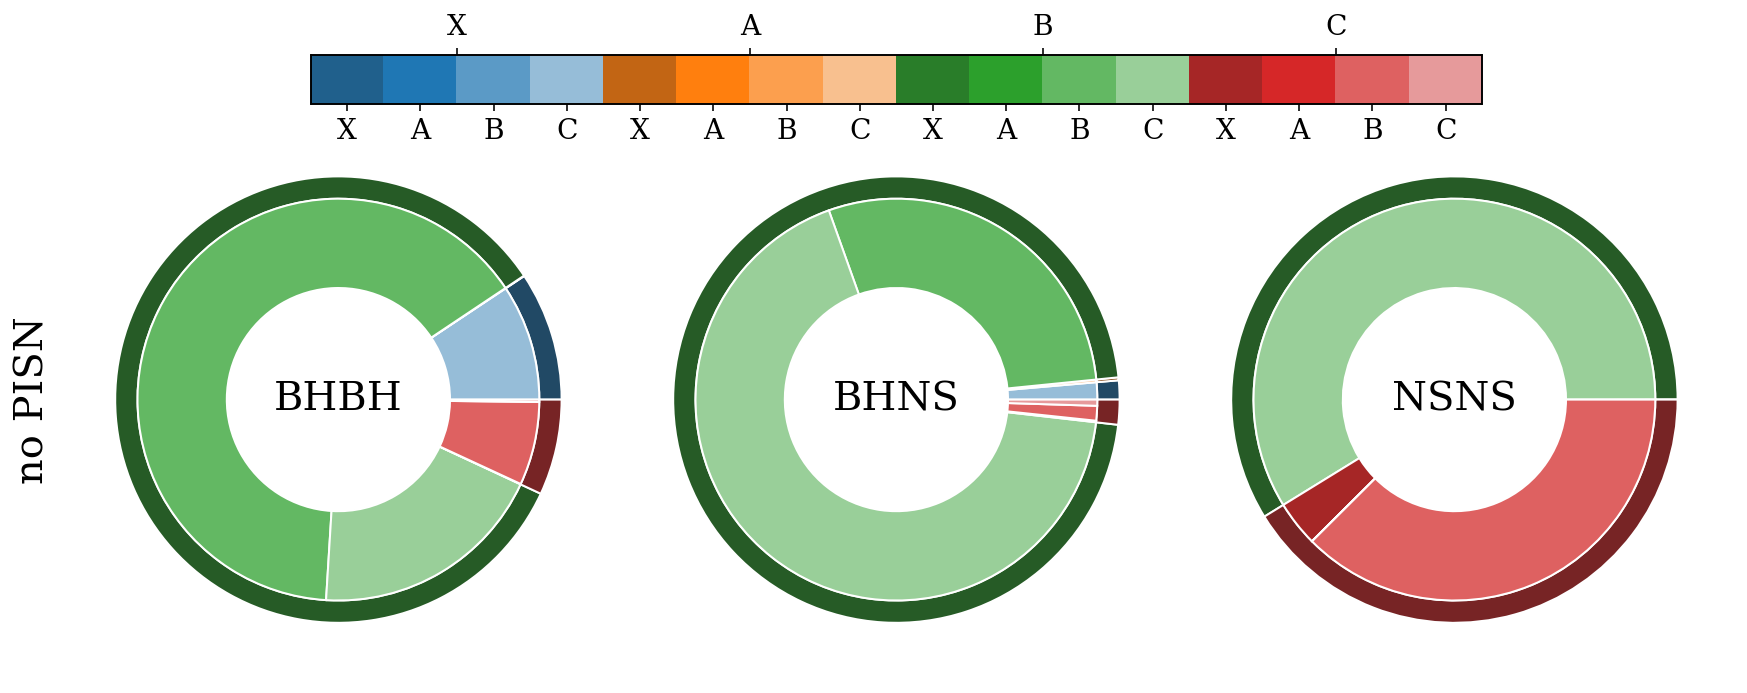

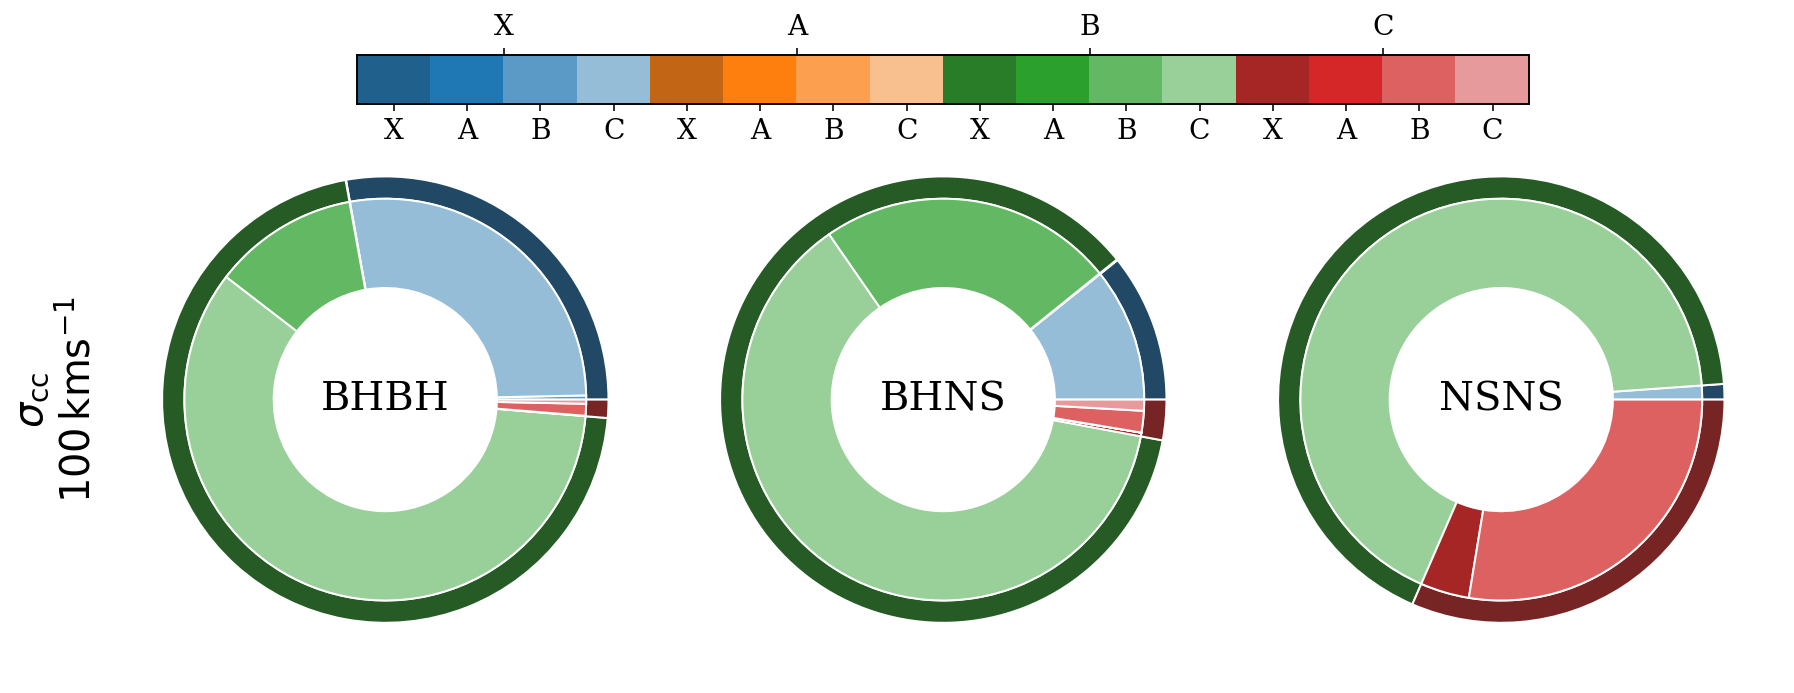

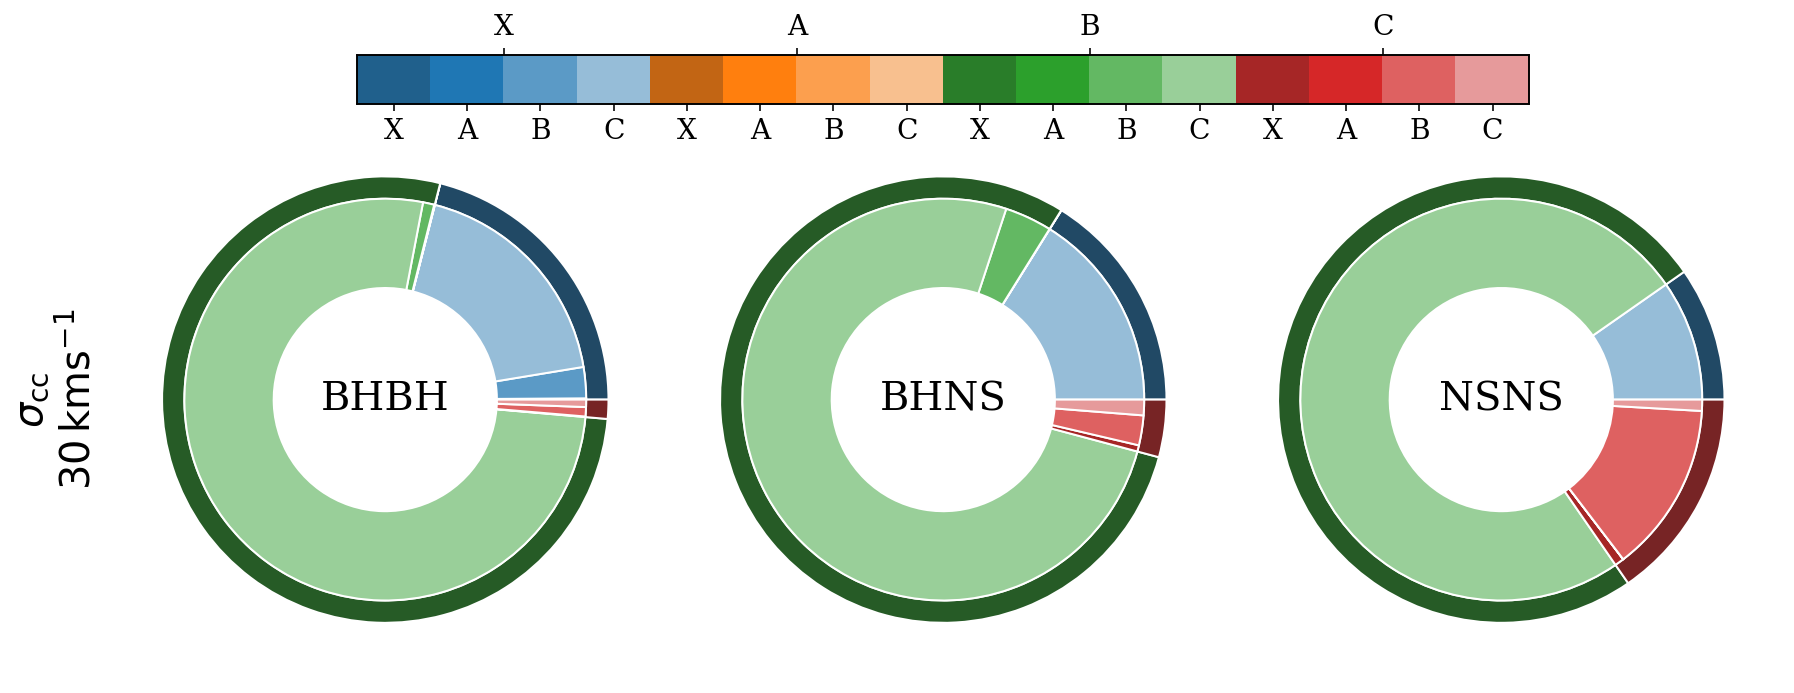

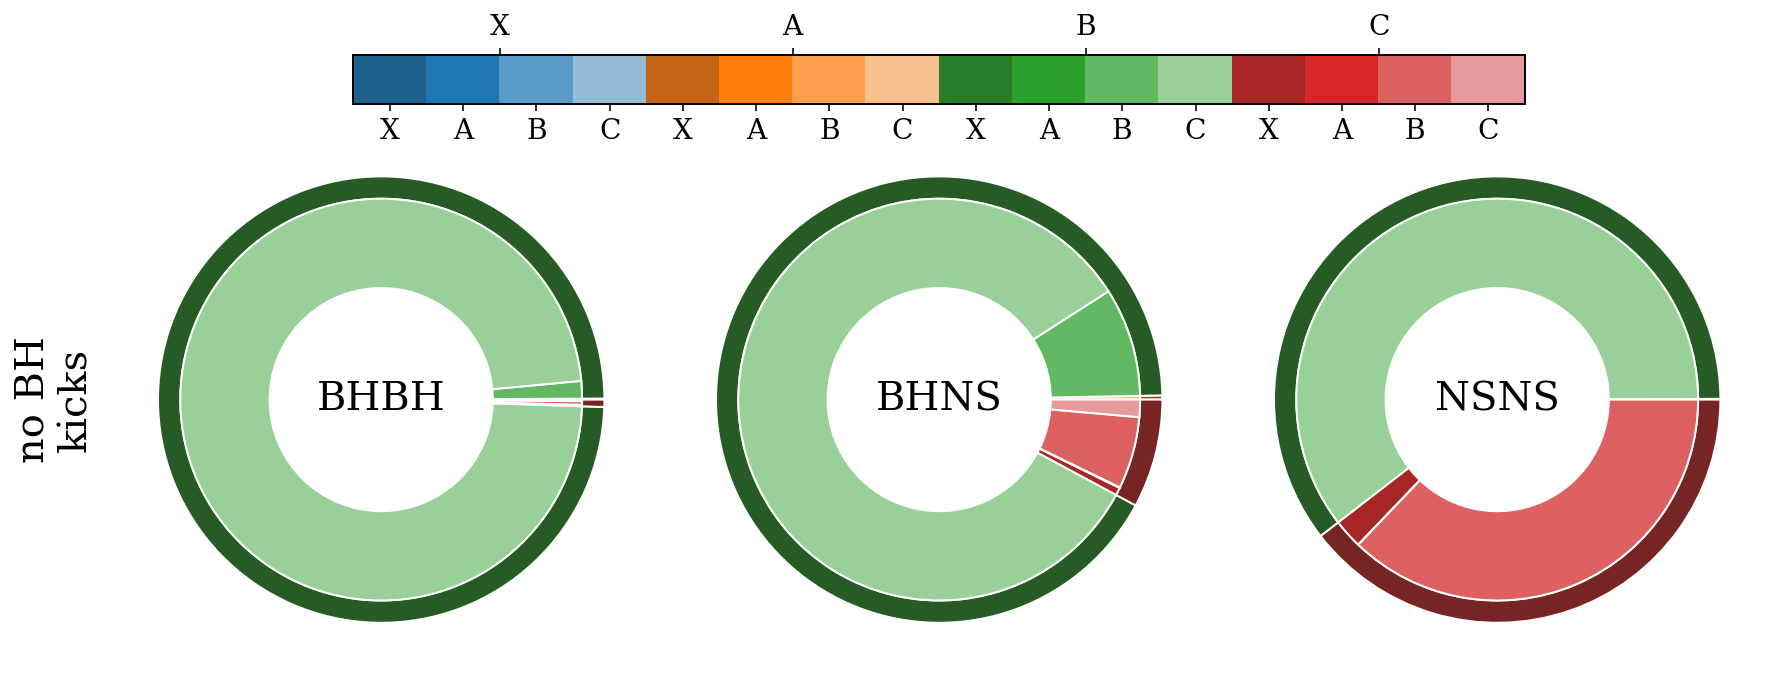

In [185]:
inner_colours = case_colours[:, 1:, :].reshape(16, 3)
outer_colours = case_colours[:, 0]

for model in range(len(variations)):
    fig, axes = plt.subplots(1, 3, figsize=(15, 15))
    fig.subplots_adjust(wspace=0.0)
    
    zero_colours = np.zeros((4, 4))
    
    for d in range(len(dco_types)):
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_types[d], variations[model]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = full_data["snr"] > 7

            data = full_data[mask]

        fractions = np.zeros((4, 4))
        for case_mt1 in case_list:
            for case_mt2 in case_list:
                matches = np.logical_and(data["MT1_case"] == case_mt1,
                                          data["MT2_case"] == case_mt2)
                fractions[case_mt1, case_mt2] = np.sum(data["weight"][matches]) / np.sum(data["weight"])

        size = 0.1
        outer = fractions.sum(axis=1)
        outer_mask = outer > 0.00
        axes[d].pie(outer[outer_mask], radius=1, normalize=True,
                                            colors=outer_colours[outer_mask], wedgeprops=dict(width=size, edgecolor='w'))

        inner = fractions.flatten()
        inner_mask = inner > 0.00

        axes[d].pie(inner[inner_mask], radius=1 - size, normalize=True,
                                            colors=inner_colours[inner_mask], wedgeprops=dict(width=size * 4, edgecolor='w'))
        axes[d].annotate(dco_types[d], xy=(0, 0), ha="center", va="center", fontsize=fs)
        
        zero_colours += fractions
        
    zero_colours = zero_colours.flatten()

    cmap = matplotlib.colors.ListedColormap(case_colours[:, 1:, :].reshape(16, 3))
    cbar = fig.colorbar(matplotlib.cm.ScalarMappable(cmap=cmap), ax=axes, fraction=0.03, pad=0.01, location="top", shrink=0.7)
    cbar.set_ticks([x / 32 for x in range(1, 32, 2)])
    cbar.set_ticklabels(["X", "A", "B", "C"] * 4)
    cbar.ax.set_aspect("auto")
    
#     for i in range(len(zero_colours)):
#         if zero_colours[i] == 0.0:
#             x_coords = [(i + 0.1) / 16, (i + 0.9) / 16]
#             cbar.ax.plot(x_coords, [0.1, 0.9], color="black")
#             cbar.ax.plot(x_coords, [0.9, 0.1], color="black")

    ax2 = cbar.ax.twiny()
    ax2.set_xticks([1/8, 3/8, 5/8, 7/8])
    ax2.set_xticklabels(["X", "A", "B", "C"])
    
    axes[0].set_ylabel(variations[model]["med"])

    # plt.savefig("../../paper/figures/MT_cases_fiducial.png", dpi=1200, bbox_inches="tight")

    plt.show()

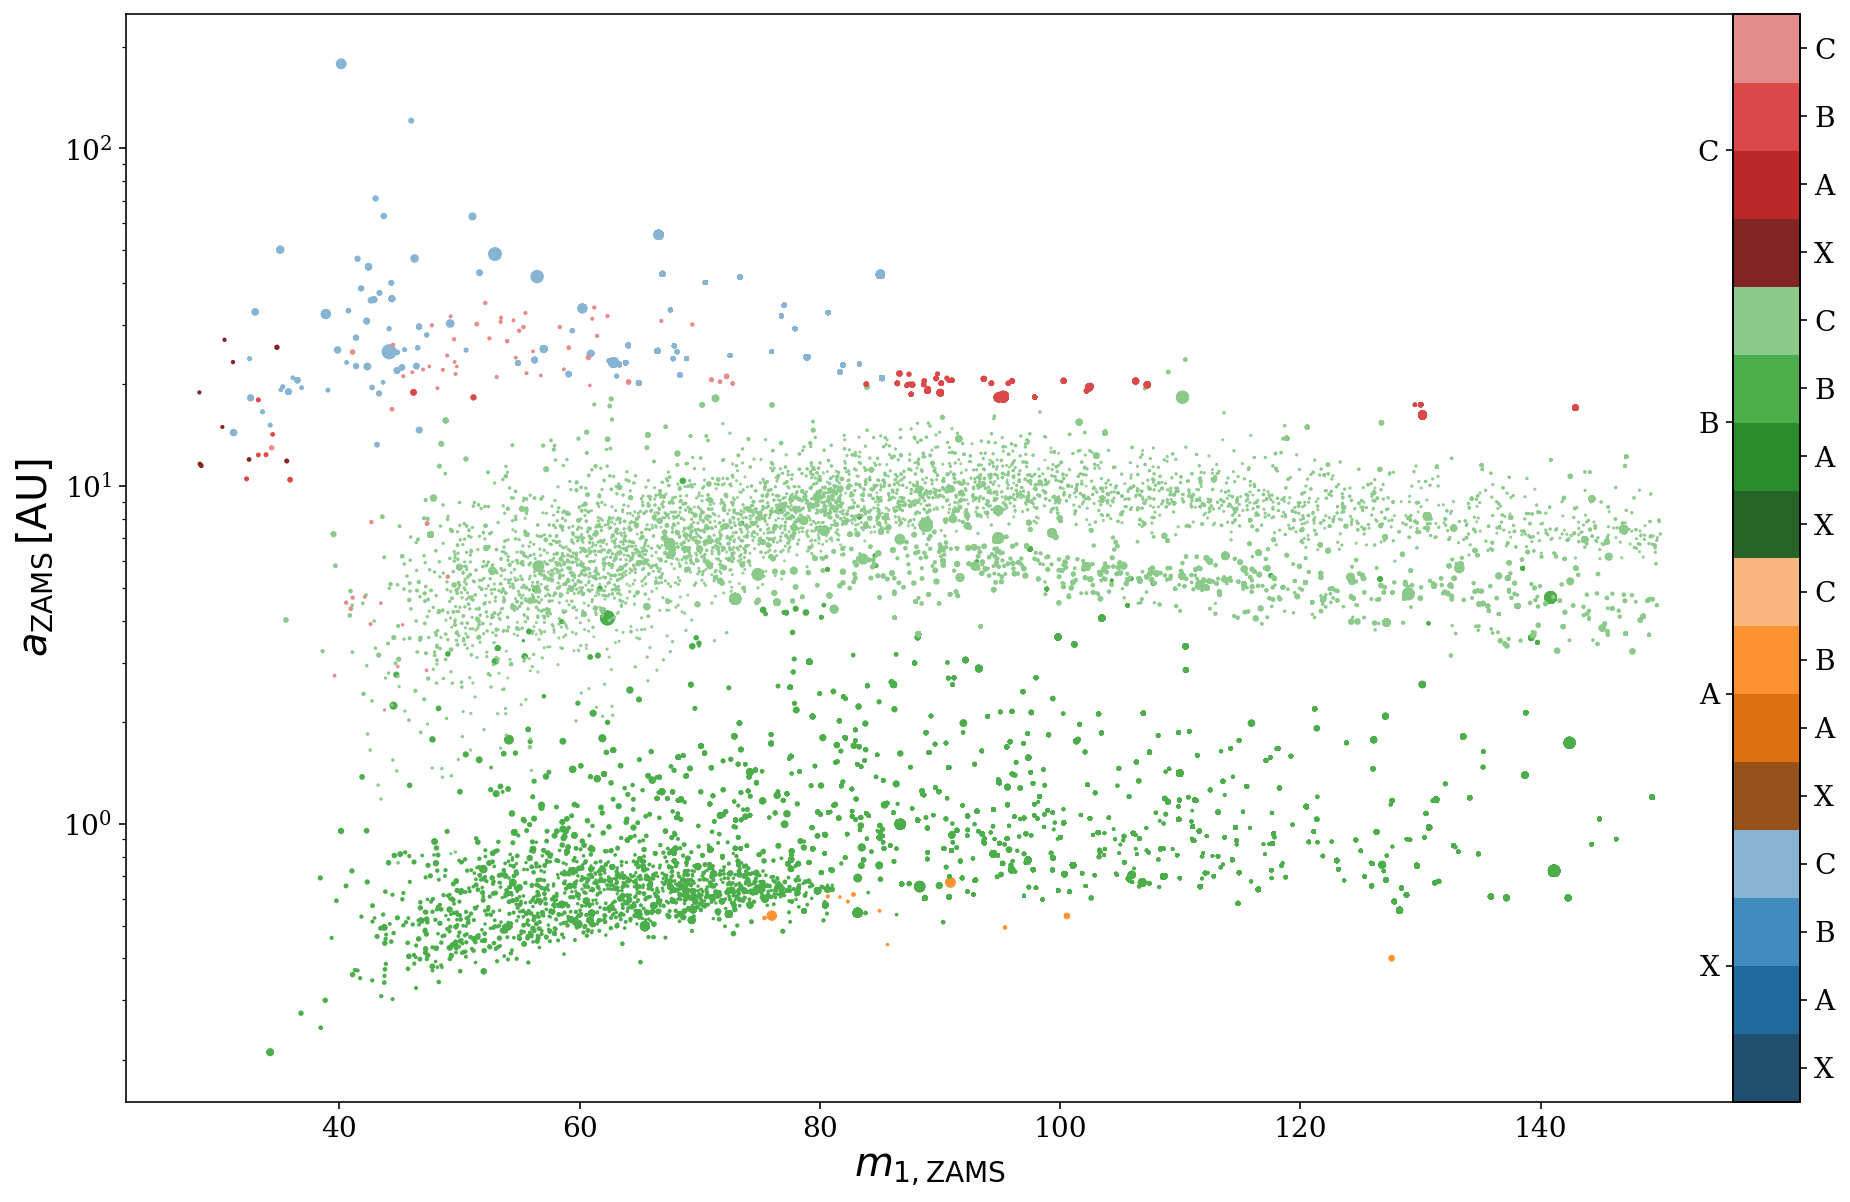

In [104]:
fig, ax = plt.subplots(figsize=(15, 10))

model = 0

with h5.File(sim_folder + "{}_{}_all.h5".format("BHBH", variations[model]["file"]), "r") as f:
    full_data = f["simulation"][...].squeeze()
    snr_mask = full_data["snr"] > 7

    data = full_data[snr_mask]

m1 = np.maximum(data["m_1_ZAMS"], data["m_2_ZAMS"])
m2 = np.minimum(data["m_1_ZAMS"], data["m_2_ZAMS"])
q = m2 / m1

for case in case_list:
    for case2 in case_list:
        mask = np.logical_and(data["MT1_case"] == case,
                              data["MT2_case"] == case2)

        ax.scatter(m1[mask], data["a_ZAMS"][mask], s=data["weight"][mask] * 50, color=case_colours[case, case2 + 1])#, label=case_labels[(case * 4) + case2])

cmap = matplotlib.colors.ListedColormap(case_colours[:, 1:, :].reshape(16, 3))
cbar = fig.colorbar(matplotlib.cm.ScalarMappable(cmap=cmap), fraction=0.04, pad=0.0)
cbar.set_ticks([1/8, 3/8, 5/8, 7/8])
cbar.set_ticklabels(["X", "A", "B", "C"])
cbar.ax.set_aspect("auto")

ax2 = cbar.ax.twinx()
ax2.set_yticks([x / 32 for x in range(1, 32, 2)])
ax2.set_yticklabels(["X", "A", "B", "C"] * 4)

ax.set_yscale("log")

ax.set_xlabel(r"$m_{1, \rm ZAMS}$")
ax.set_ylabel(r"$a_{\rm ZAMS}\, [\rm AU]$")

plt.savefig("../../paper/figures/BHBH_q_a_ZAMS_cases.png", dpi=400)

plt.show()

In [3]:
def kdeplot_by_channel(variable, dco_type_list=["BHBH", "BHNS", "NSNS"], channels=[0, 1, 2, 3, 4], variation_index=0, show=True, fig=None, ax=None, **kwargs):
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, figsize=(10, 5))

    for dco_type in dco_type_list:
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[variation_index]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = np.logical_and(full_data["snr"] > 7, np.isin(full_data["channel"], channels))

            data = full_data[mask]
            print(len(data))

        sns.kdeplot(data[variable], weights=data["weight"], color=dco_colours[dco_type], cut=0, **kwargs, ax=ax)

    if show:
        print("yo")
        plt.show()
    return fig, ax

# Some random investigations

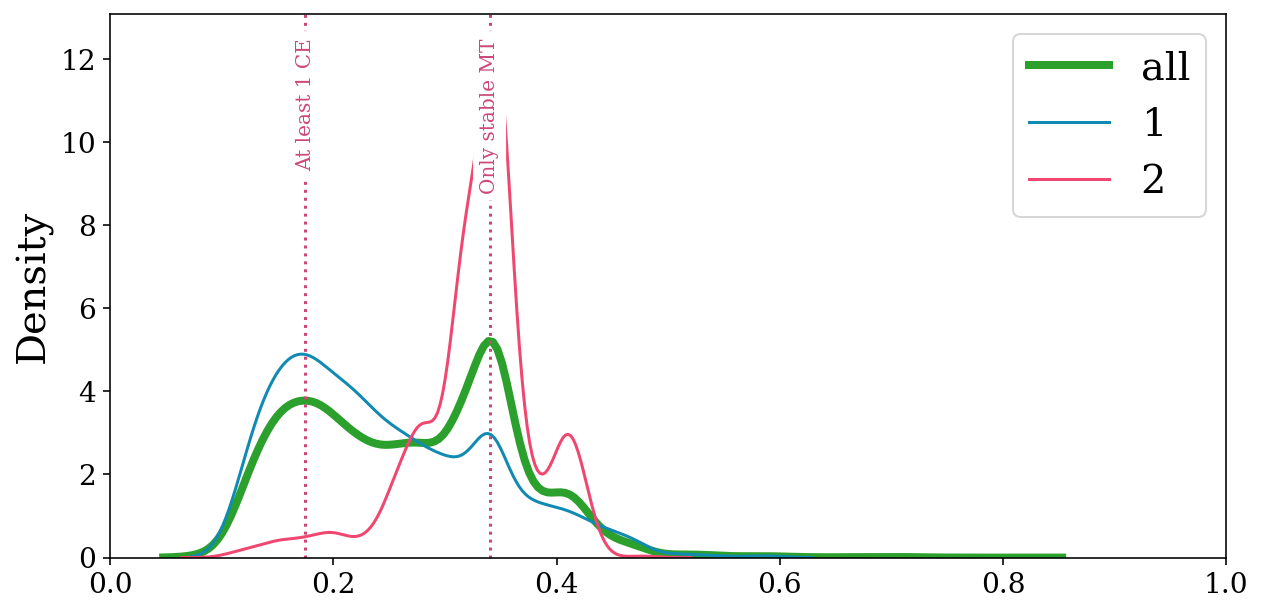

In [45]:
fig, ax = plt.subplots(1, figsize=(10, 5))

for dco_type in ["BHNS"]:
    with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[0]["file"]), "r") as f:
        full_data = f["simulation"][...].squeeze()
        snr_mask = full_data["snr"] > 7

        data = full_data[snr_mask]
                
    q = data["m_2"] / data["m_1"]
    q[q > 1] = 1 / q[q > 1]
    
    mBH = np.maximum(data["m_1"], data["m_2"])
    mNS = np.minimum(data["m_1"], data["m_2"])
    
    sns.kdeplot(q, weights=data["weight"], label="all", color="tab:green", lw=4)

    for channel in [1, 2]:    
        sns.kdeplot(q[np.isin(data["channel"], channel)], weights=data["weight"][np.isin(data["channel"], channel)], label=channel, color=channels[channel]["colour"])

    if dco_type == "BHNS":
        plt.axvline(0.175, color=dco_colours[dco_type], linestyle="dotted")
        plt.annotate("At least 1 CE", xy=(0.175, 12.5), va="top", ha="center", bbox=dict(boxstyle="round", fc="white", ec="white"), 
                     rotation=90, fontsize=0.5*fs, color=dco_colours[dco_type])
        plt.axvline(0.34, color=dco_colours[dco_type], linestyle="dotted")
        plt.annotate("Only stable MT", xy=(0.34, 12.5), va="top", ha="center", bbox=dict(boxstyle="round", fc="white", ec="white"), 
                     rotation=90, fontsize=0.5*fs, color=dco_colours[dco_type])

plt.legend()

plt.xlim(0, 1)

plt.show()

In [156]:
def kde(variable, weights, bw_adjust=1.0, x_min=None, x_max=None, x_count=200,
        lower_bound=None, upper_bound=None, verbose=False):
    if x_min is None:
        x_min = np.min(variable)
    if x_max is None:
        x_max = np.max(variable)
    x_vals = np.linspace(x_min, x_max, x_count)

    cv = (1 / np.sum((weights / np.sum(weights))**2))**(-1./(1+4))
    bw = cv * np.std(variable)
        
    exceeds_lower_bound = lower_bound is not None and np.min(variable) < lower_bound + bw
    exceeds_upper_bound = upper_bound is not None and np.max(variable) > upper_bound - bw
    
    if exceeds_lower_bound and exceeds_upper_bound:
        if verbose:
            print("exceeds both bounds")
        variable = np.concatenate((2 * lower_bound - variable, variable, 2 * upper_bound - variable))
        weights = np.repeat(weights, 3)
        height_adjust = 3
    elif exceeds_lower_bound:
        if verbose:
            print("exceeds lower bounds")
        variable = np.concatenate((variable, 2 * lower_bound - variable))
        weights = np.concatenate((weights, weights))
        height_adjust = 2
    elif exceeds_upper_bound:
        if verbose:
            print("exceeds upper bounds")
        variable = np.concatenate((variable, 2 * upper_bound - variable))
        weights = np.concatenate((weights, weights))
        height_adjust = 2
    else:
        height_adjust = 1
    
    kde = gaussian_kde(variable, weights=weights)
    kde.set_bandwidth(bw / np.std(variable))
    if bw_adjust is not None:
        kde.set_bandwidth(kde.factor * bw_adjust)

    # evaluate kde
    kde_vals = kde.evaluate(x_vals) * height_adjust
    
    return x_vals, kde_vals

exceeds lower bounds


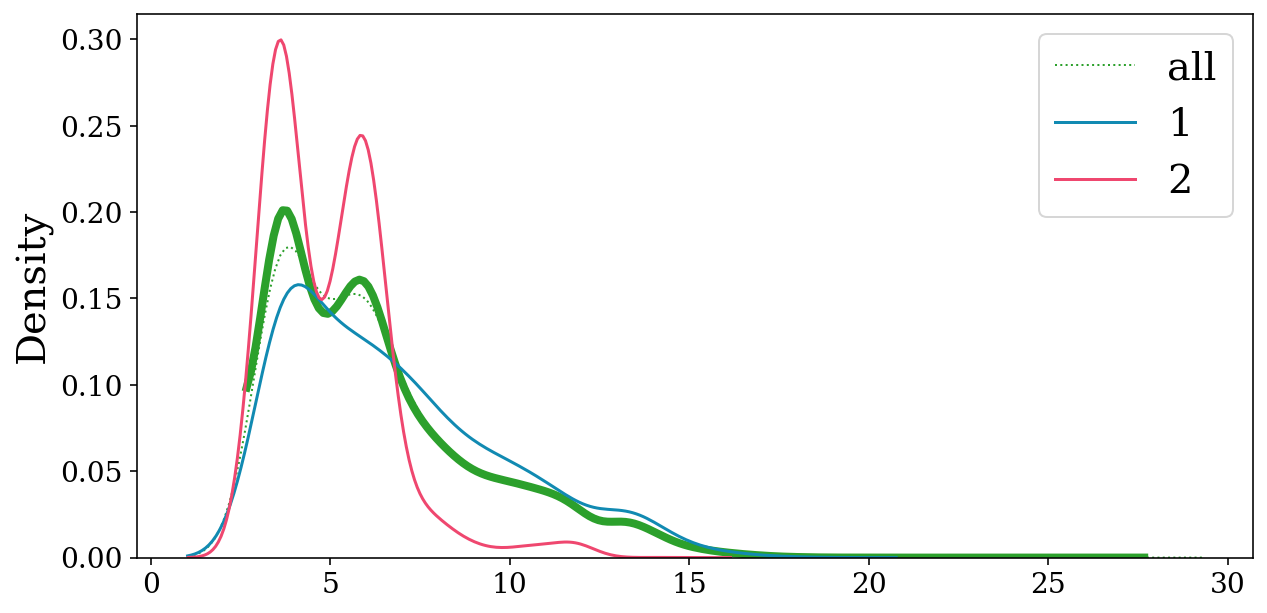

In [163]:
fig, ax = plt.subplots(1, figsize=(10, 5))

for dco_type in ["BHNS"]:
    with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[0]["file"]), "r") as f:
        full_data = f["simulation"][...].squeeze()
        snr_mask = full_data["snr"] > 7

        data = full_data[snr_mask]
                
    q = data["m_2"] / data["m_1"]
    q[q > 1] = 1 / q[q > 1]
    
    mBH = np.maximum(data["m_1"], data["m_2"])
    mNS = np.minimum(data["m_1"], data["m_2"])
    
#     ax.axvline(2.5)
    
    sns.kdeplot(mBH, weights=data["weight"], label="all", lw=1, color="tab:green", bw_adjust=1.4, linestyle="dotted")
    plt.plot(*kde(mBH, data["weight"], verbose=True, lower_bound=2.5, bw_adjust=1.4), color="tab:green", lw=4)

    for channel in [1, 2]:    
        sns.kdeplot(mBH[np.isin(data["channel"], channel)], weights=data["weight"][np.isin(data["channel"], channel)], label=channel, color=channels[channel]["colour"], bw_adjust=1.4)

plt.legend()

# plt.xlim(1, 4)

plt.show()

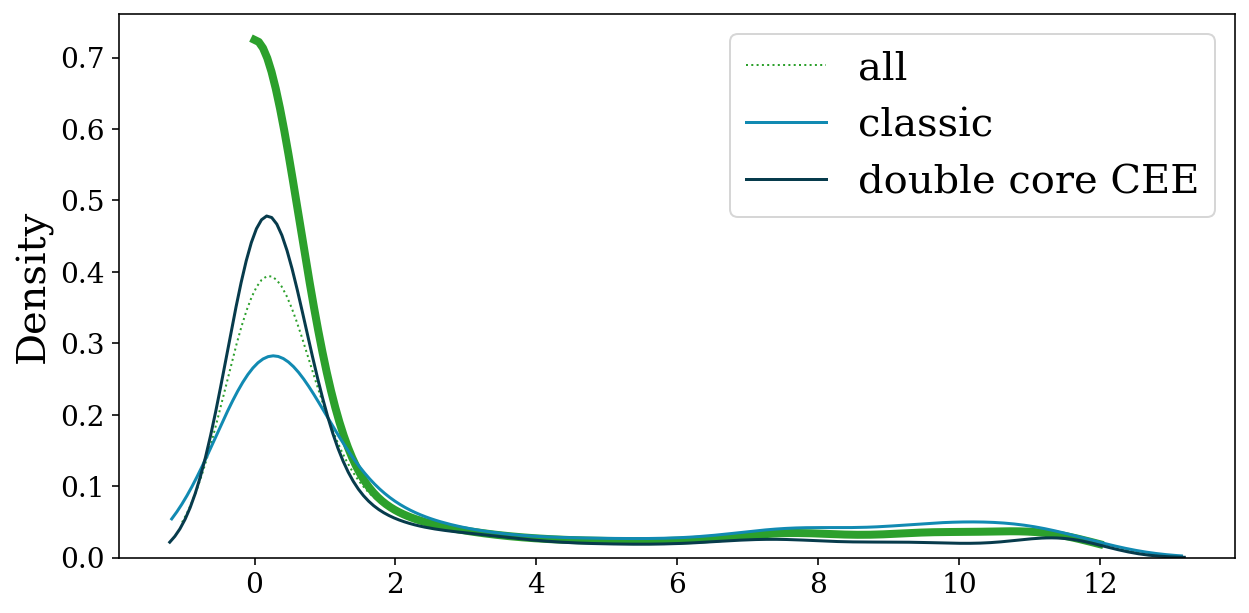

In [166]:
fig, ax = plt.subplots(1, figsize=(10, 5))

for dco_type in ["NSNS"]:
    with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[0]["file"]), "r") as f:
        full_data = f["simulation"][...].squeeze()
        snr_mask = full_data["snr"] > 7

        data = full_data[snr_mask]
    
    sns.kdeplot(data["tau"], weights=data["weight"], label="all", lw=1, color="tab:green", linestyle="dotted")
    plt.plot(*kde(data["tau"], data["weight"], lower_bound=0.0), color="tab:green", lw=4)

    for channel in [1, 4]:    
        sns.kdeplot(data["tau"][np.isin(data["channel"], channel)], weights=data["weight"][np.isin(data["channel"], channel)], label=channels[channel]["label"], color=channels[channel]["colour"])

plt.legend()

plt.show()

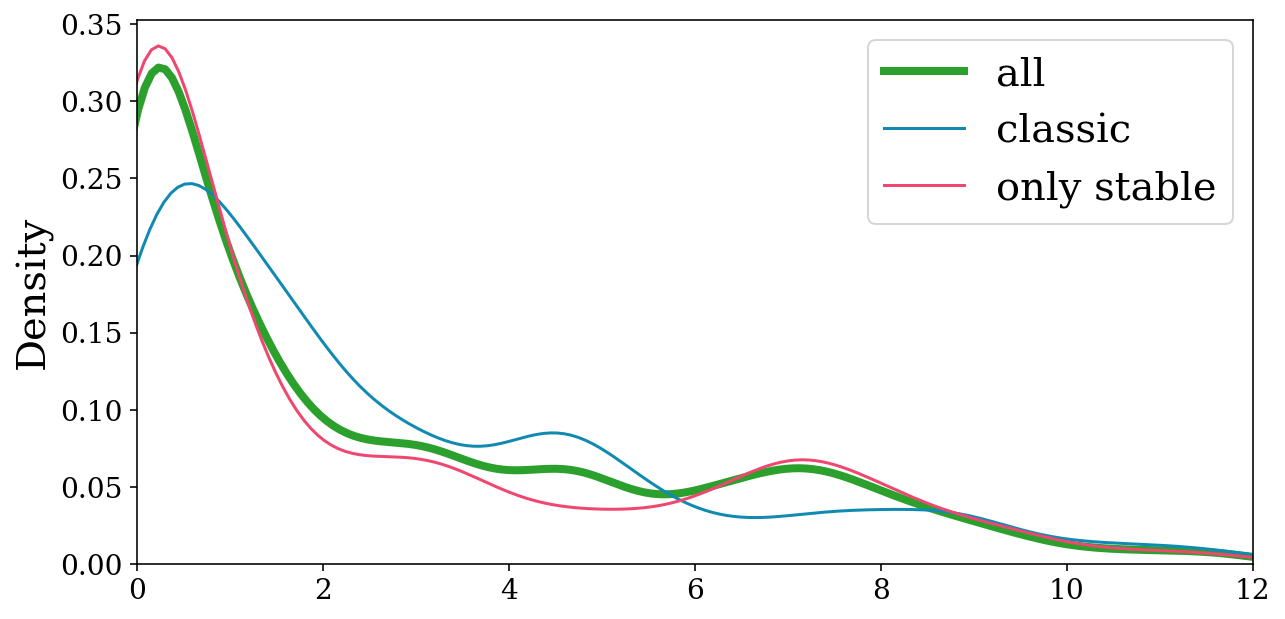

In [50]:
fig, ax = plt.subplots(1, figsize=(10, 5))

for dco_type in ["BHBH"]:
    with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[0]["file"]), "r") as f:
        full_data = f["simulation"][...].squeeze()
        snr_mask = full_data["snr"] > 7

        data = full_data[snr_mask]
    
    sns.kdeplot(data["tau"], weights=data["weight"], label="all", lw=4, color="tab:green")

    for channel in [1, 2]:    
        sns.kdeplot(data["tau"][np.isin(data["channel"], channel)], weights=data["weight"][np.isin(data["channel"], channel)], label=channels[channel]["label"], color=channels[channel]["colour"])

plt.legend()

plt.xlim(0, 12)

plt.show()

# NSNS mass ratio

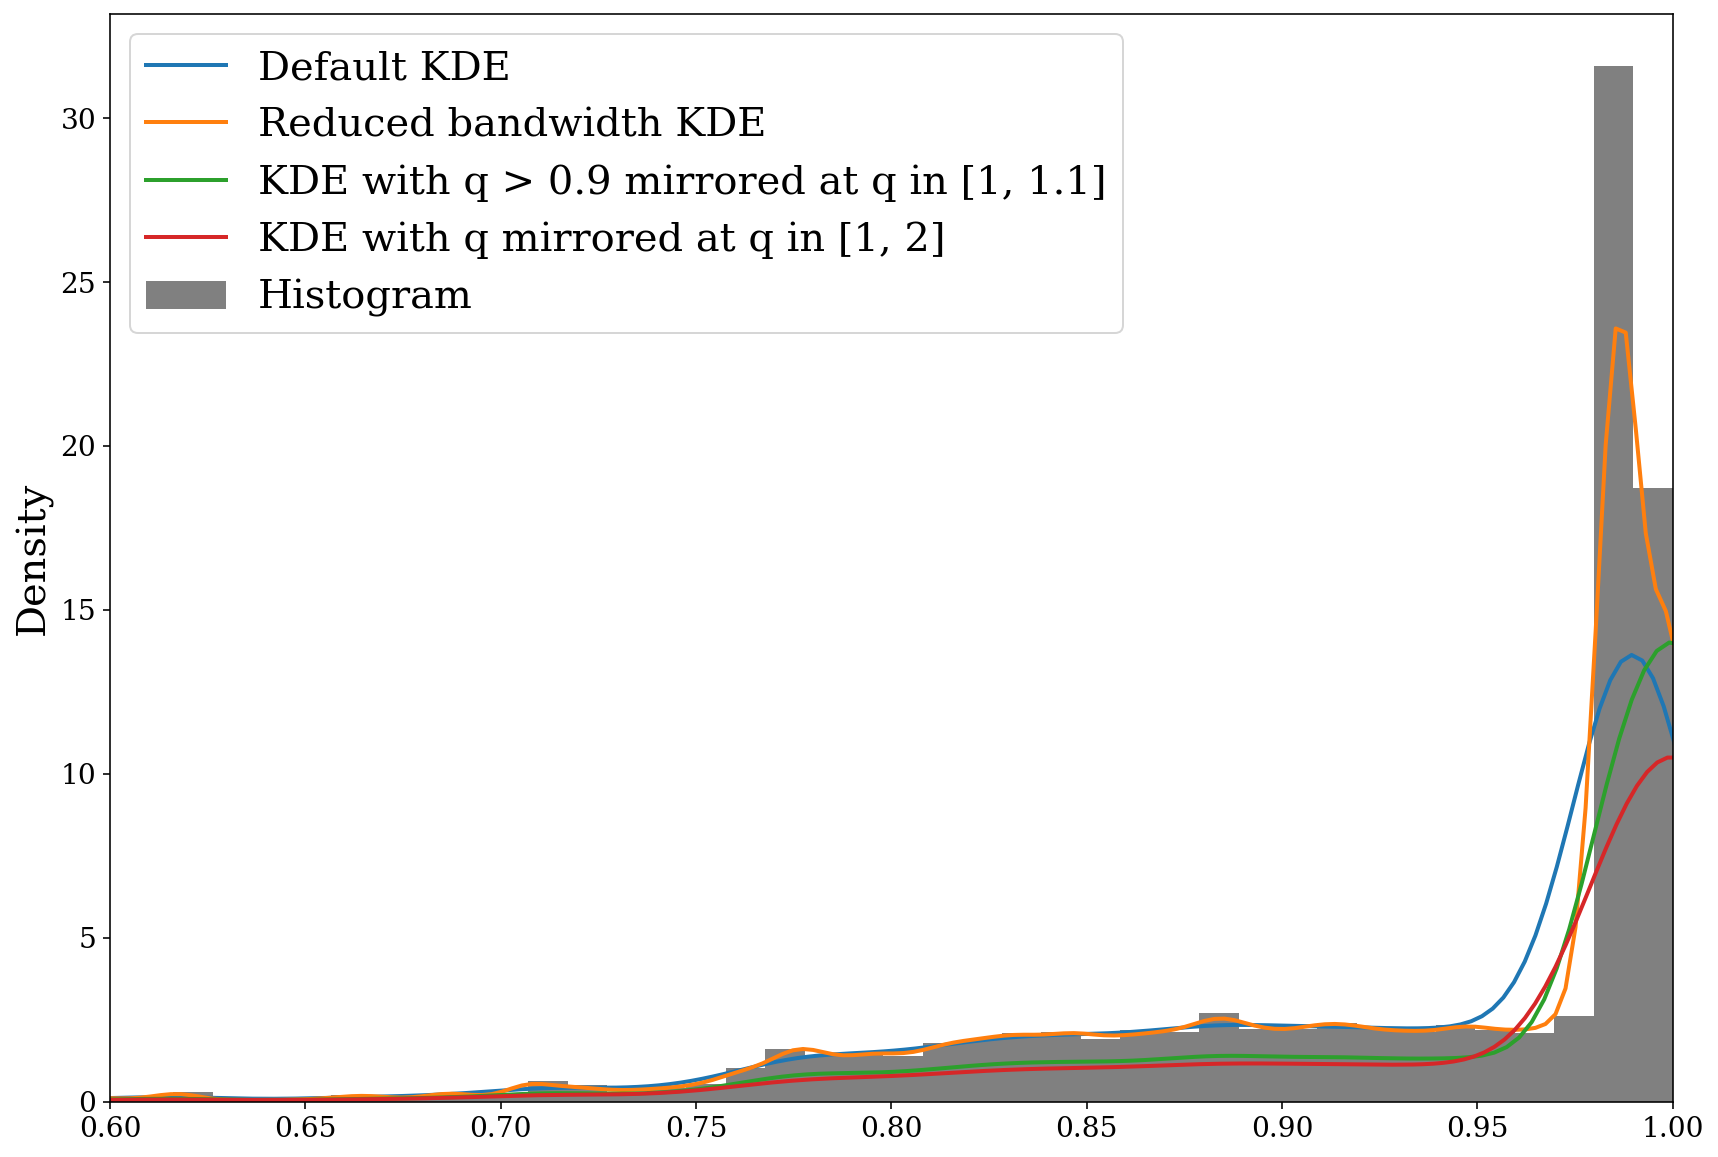

In [141]:
fig, ax = plt.subplots(1, figsize=(14, 10))

for dco_type in ["NSNS"]:
    with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[0]["file"]), "r") as f:
        full_data = f["simulation"][...].squeeze()
        snr_mask = full_data["snr"] > 7

        data = full_data[snr_mask]
                
    m_1 = np.maximum(data["m_1"], data["m_2"])
    m_2 = np.minimum(data["m_1"], data["m_2"])
        
    q = data["m_2"] / data["m_1"]
    q[q > 1] = 1 / q[q > 1]
    
    ax.hist(q, weights=data["weight"], bins=np.linspace(0, 1, 100), density=True, label="Histogram", color="grey")
    
    sns.kdeplot(q, weights=data["weight"], label="Default KDE", lw=2)
    sns.kdeplot(q, weights=data["weight"], bw_adjust=0.4, label="Reduced bandwidth KDE", lw=2)
    
    mirror_range = np.logical_and(q >= 0.9, q <= 1.0)
    mirror_data = 2 - q[mirror_range]
    sns.kdeplot(np.concatenate((q, mirror_data)), weights=np.concatenate((data["weight"], data["weight"][mirror_range])), label="KDE with q > 0.9 mirrored at q in [1, 1.1]", lw=2)
    
    mirror_range = np.logical_and(q >= 0.0, q <= 1.0)
    mirror_data = 2 - q[mirror_range]
    sns.kdeplot(np.concatenate((q, mirror_data)), weights=np.concatenate((data["weight"], data["weight"][mirror_range])), label="KDE with q mirrored at q in [1, 2]", lw=2, gridsize=400)
    

plt.legend()

plt.xlim(0.6, 1)

plt.show()

In [5]:
from scipy.stats import gaussian_kde

In [146]:
.shape

(65610,)

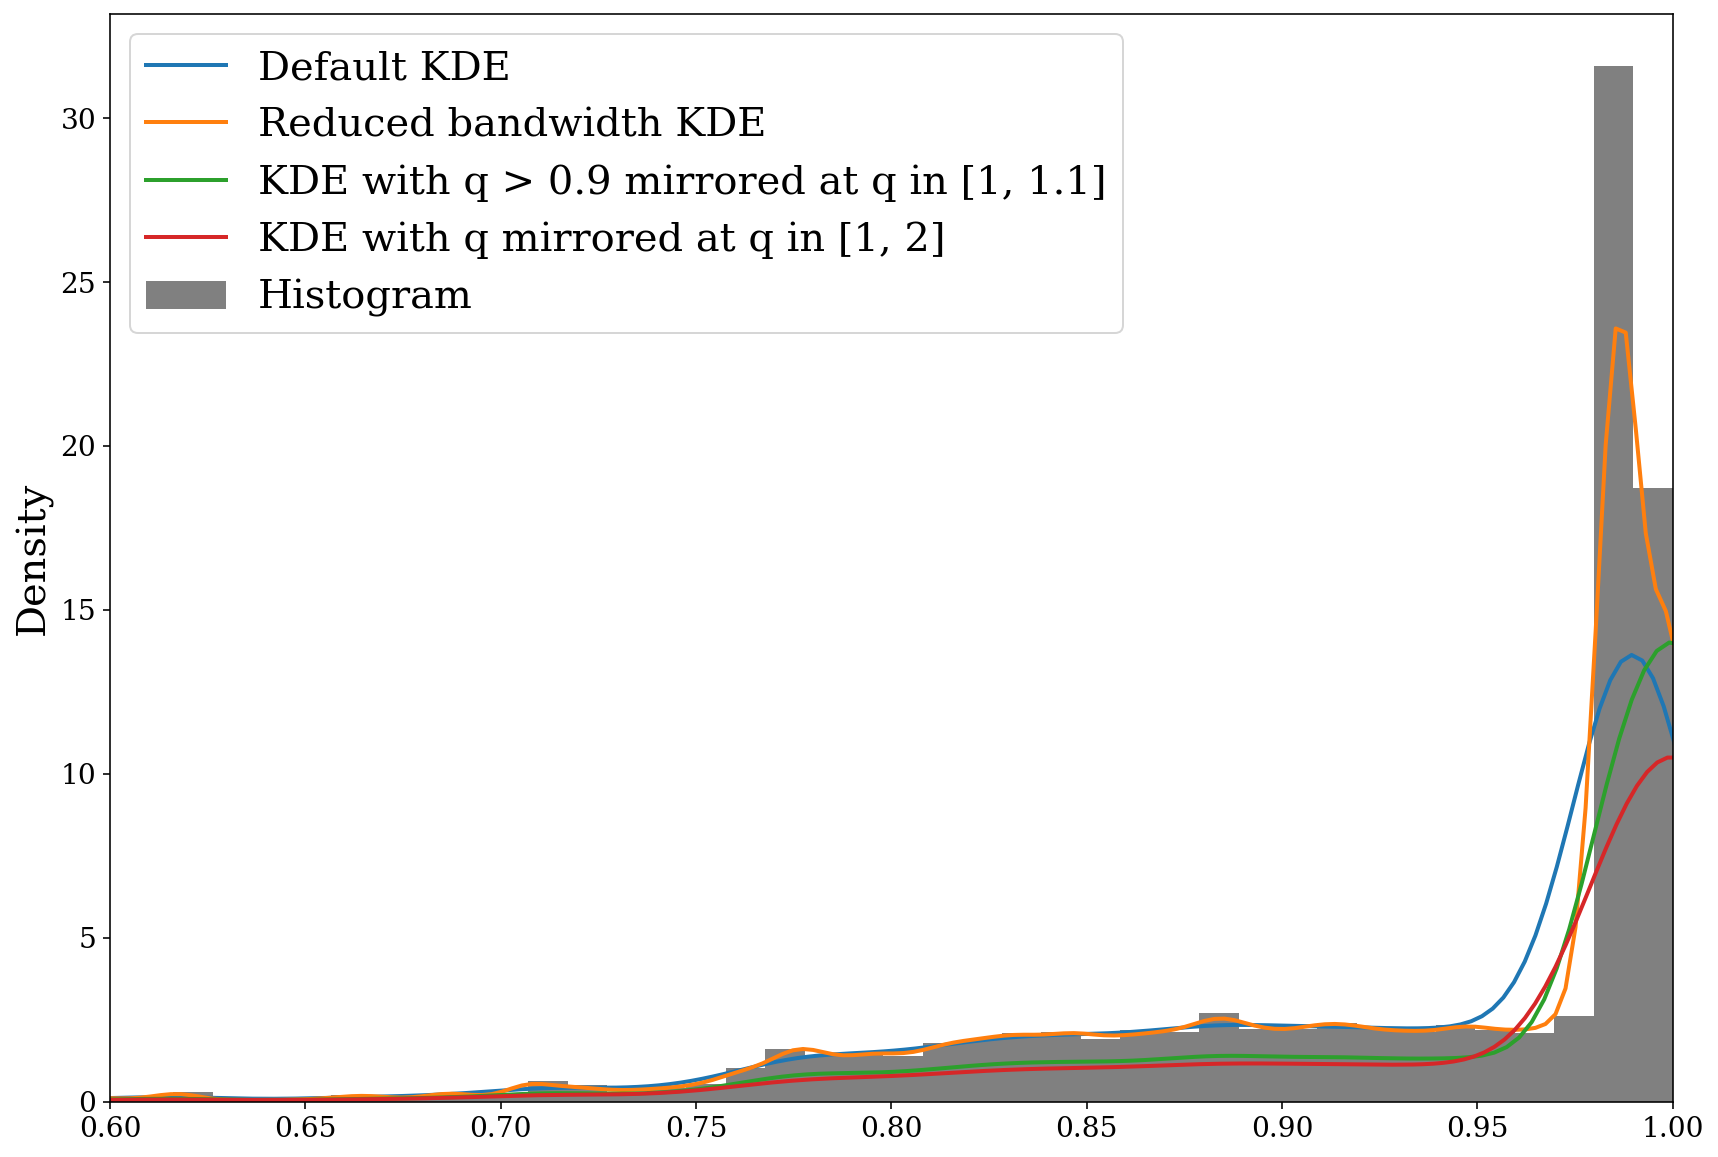

In [141]:
fig, ax = plt.subplots(1, figsize=(14, 10))

for dco_type in ["NSNS"]:
    with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[0]["file"]), "r") as f:
        full_data = f["simulation"][...].squeeze()
        snr_mask = full_data["snr"] > 7

        data = full_data[snr_mask]
                
    m_1 = np.maximum(data["m_1"], data["m_2"])
    m_2 = np.minimum(data["m_1"], data["m_2"])
        
    q = data["m_2"] / data["m_1"]
    q[q > 1] = 1 / q[q > 1]
    
    ax.hist(q, weights=data["weight"], bins=np.linspace(0, 1, 100), density=True, label="Histogram", color="grey")
    
    sns.kdeplot(q, weights=data["weight"], label="Default KDE", lw=2)
    sns.kdeplot(q, weights=data["weight"], bw_adjust=0.4, label="Reduced bandwidth KDE", lw=2)
    
    mirror_range = np.logical_and(q >= 0.9, q <= 1.0)
    mirror_data = 2 - q[mirror_range]
    sns.kdeplot(np.concatenate((q, mirror_data)), weights=np.concatenate((data["weight"], data["weight"][mirror_range])), label="KDE with q > 0.9 mirrored at q in [1, 1.1]", lw=2)
    
    mirror_range = np.logical_and(q >= 0.0, q <= 1.0)
    mirror_data = 2 - q[mirror_range]
    sns.kdeplot(np.concatenate((q, mirror_data)), weights=np.concatenate((data["weight"], data["weight"][mirror_range])), label="KDE with q mirrored at q in [1, 2]", lw=2, gridsize=400)
    

plt.legend()

plt.xlim(0.6, 1)

plt.show()

In [89]:
data = np.random.uniform(0, 1, 10000)

32.1 ms ± 374 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


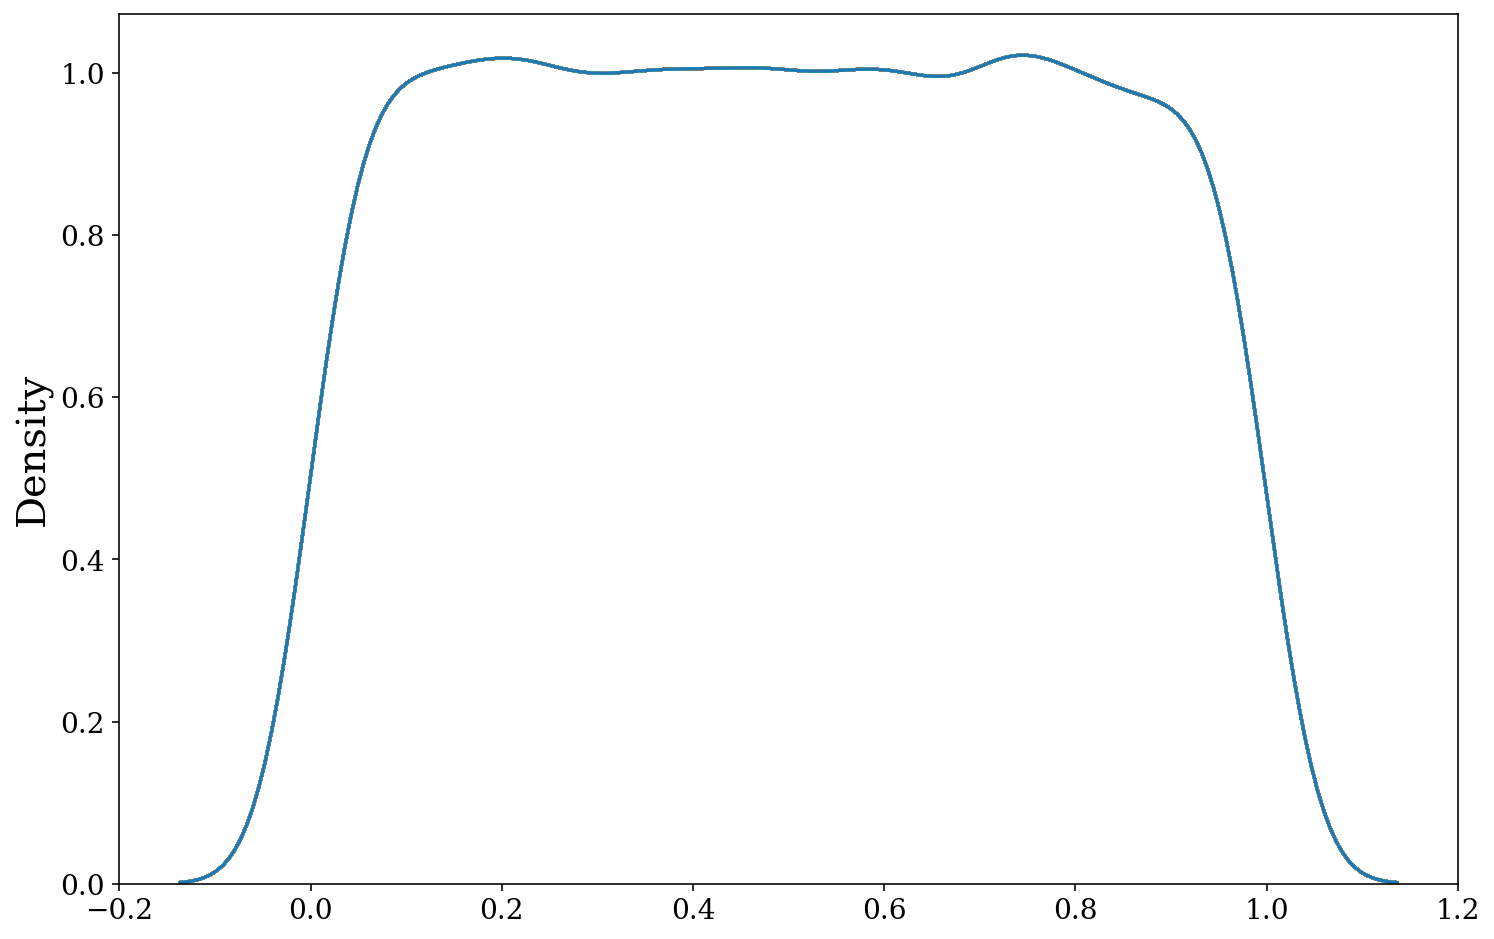

In [90]:
%%timeit
sns.kdeplot(data)

82.5 ms ± 2.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


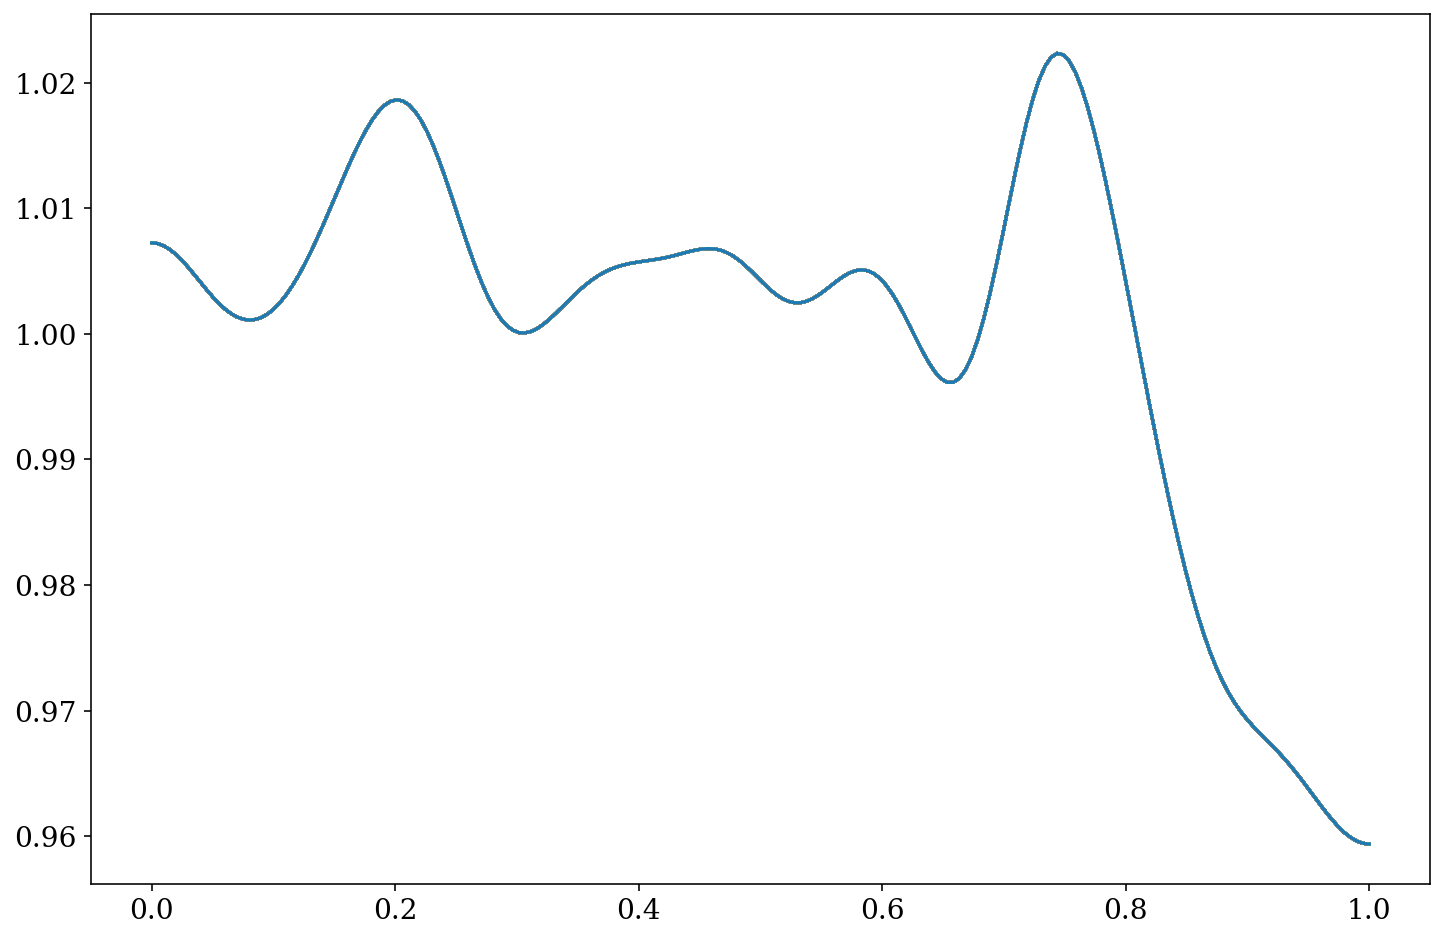

In [96]:
%%timeit
plt.plot(*kde(data, np.ones(len(data)), lower_bound=0.0, upper_bound=1.0, x_count=200))

exceeds both bounds


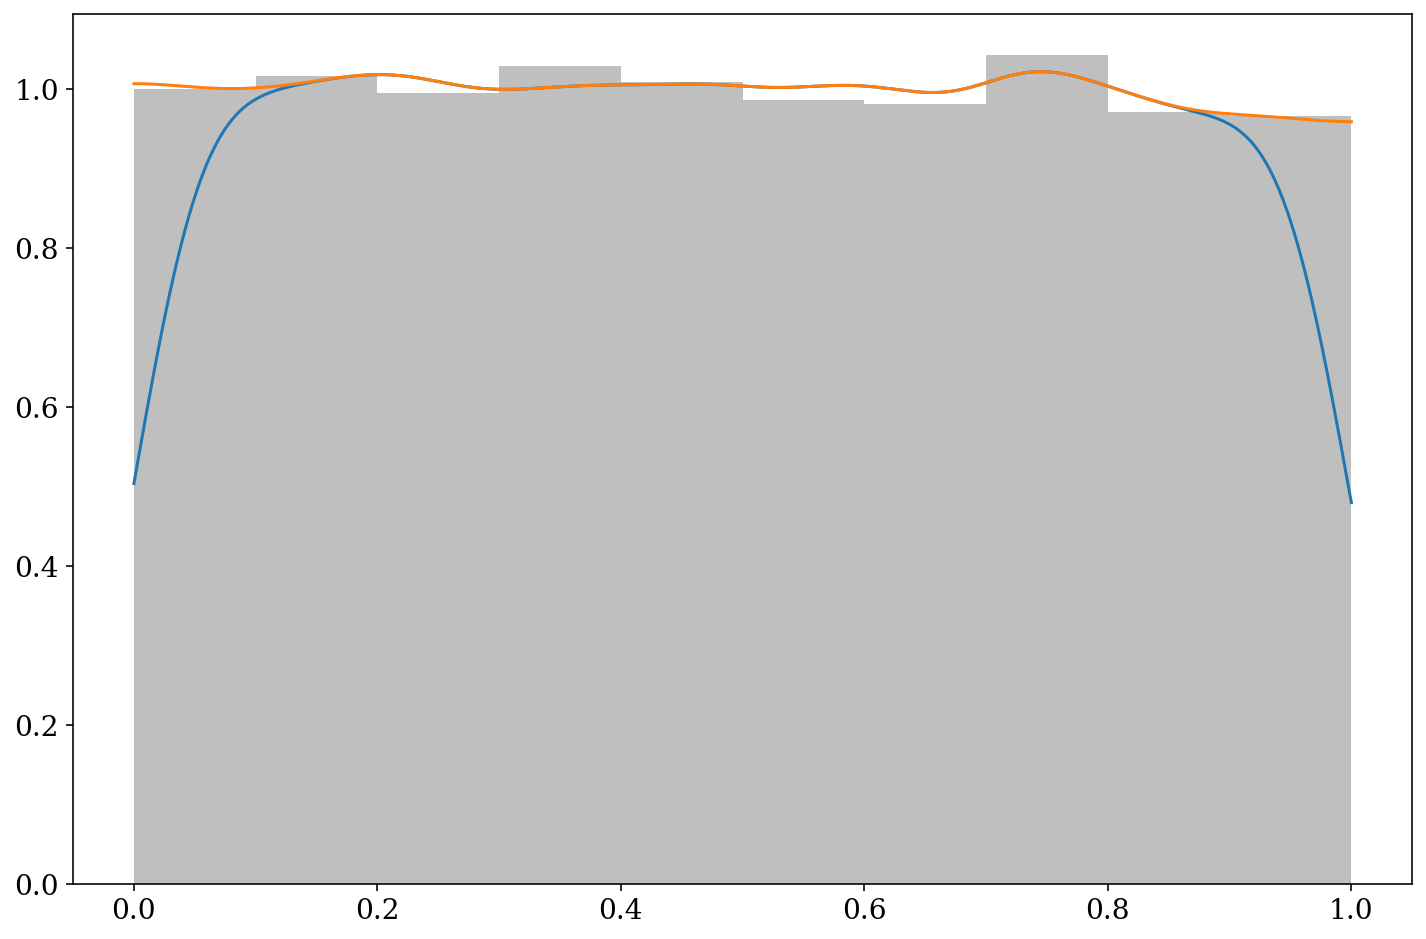

In [92]:
plt.hist(data, density=True, color="grey", alpha=0.5)

plt.plot(*kde(data, np.ones(len(data))))
plt.plot(*kde(data, np.ones(len(data)), lower_bound=0.0, upper_bound=1.0))

plt.show()

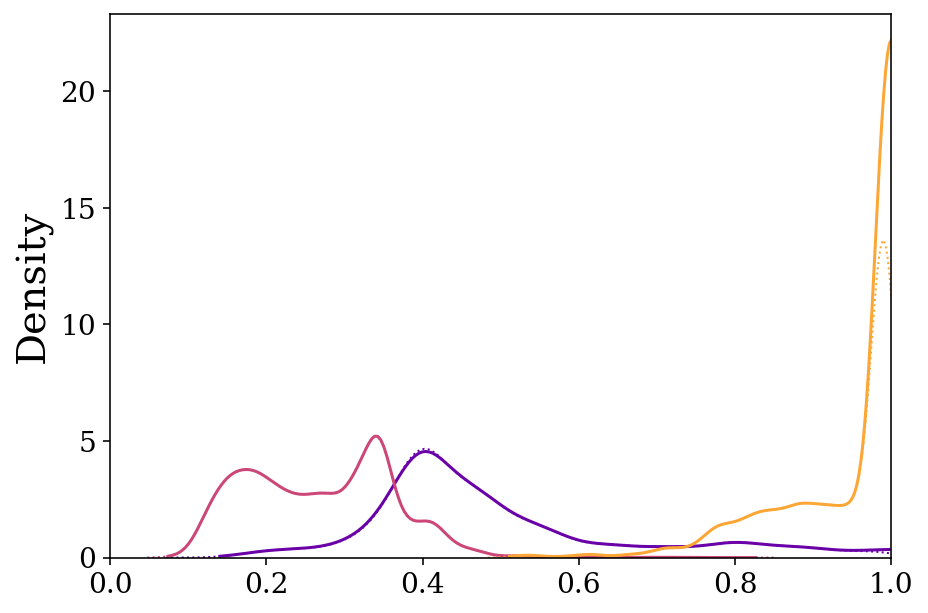

In [103]:
fig, ax = plt.subplots(1, figsize=(7, 5))

for dco_type in dco_types:
    with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[0]["file"]), "r") as f:
        full_data = f["simulation"][...].squeeze()
        snr_mask = full_data["snr"] > 7

        data = full_data[snr_mask]
                
    m_1 = np.maximum(data["m_1"], data["m_2"])
    m_2 = np.minimum(data["m_1"], data["m_2"])
        
    q = data["m_2"] / data["m_1"]
    q[q > 1] = 1 / q[q > 1]
    
    bw_adjust = 1
    
    sns.kdeplot(q, weights=data["weight"], lw=1, bw_adjust=bw_adjust, color=dco_colours[dco_type], linestyle="dotted", label="unmirrored")
    ax.plot(*kde(q, weights=data["weight"], upper_bound=1.0, bw_adjust=bw_adjust, x_count=200), color=dco_colours[dco_type], label="mirrored")

# ax.annoate("NSNS distribution extends to ")
    
plt.xlim(0, 1)
# plt.ylim(0, 10)

plt.show()

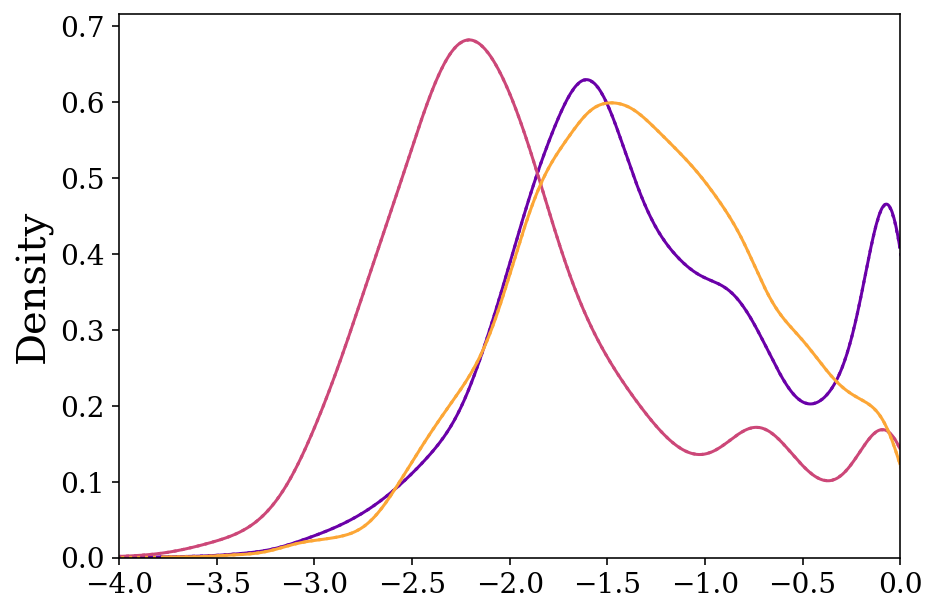

In [98]:
fig, ax = plt.subplots(1, figsize=(7, 5))

for dco_type in dco_types:
    with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[0]["file"]), "r") as f:
        full_data = f["simulation"][...].squeeze()
        snr_mask = full_data["snr"] > 7

        data = full_data[snr_mask]
                
    m_1 = np.maximum(data["m_1"], data["m_2"])
    m_2 = np.minimum(data["m_1"], data["m_2"])
        
    q = data["m_2"] / data["m_1"]
    q[q > 1] = 1 / q[q > 1]
    
    bw_adjust = 1
    
    sns.kdeplot(np.log10(data["e_LISA"]), weights=data["weight"], label="Default KDE", bw_adjust=bw_adjust, color=dco_colours[dco_type], linestyle="dotted")
    
    ax.plot(*kde(np.log10(data["e_LISA"]), weights=data["weight"], upper_bound=1.0, bw_adjust=1), color=dco_colours[dco_type])
#     ax.plot(*kde_alt(q, weights=data["weight"], lower_bound=0, upper_bound=1), label="my version - 2 bounds")

plt.xlim(-4, 0)
plt.ylim(bottom=0.0)

plt.show()

exceeds upper bound


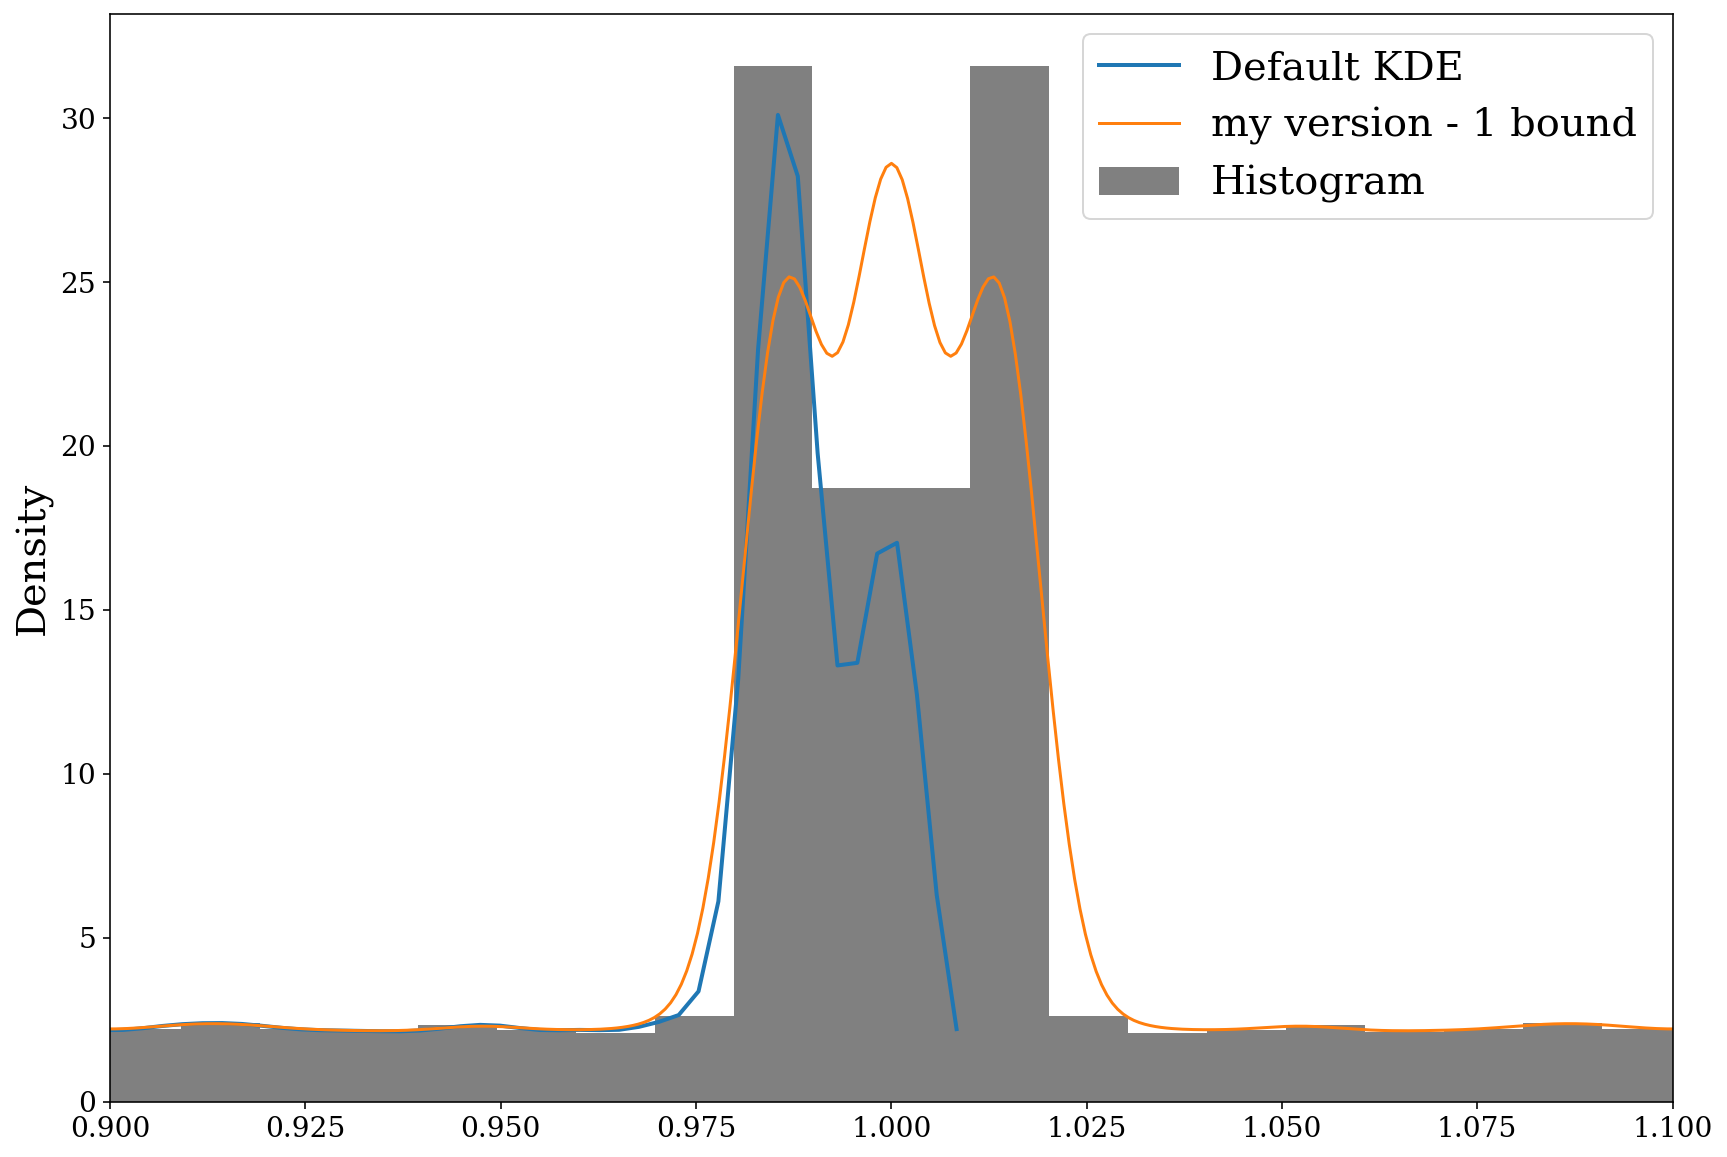

In [44]:
fig, ax = plt.subplots(1, figsize=(14, 10))

for dco_type in ["NSNS"]:
    with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[0]["file"]), "r") as f:
        full_data = f["simulation"][...].squeeze()
        snr_mask = full_data["snr"] > 7

        data = full_data[snr_mask]
                
    m_1 = np.maximum(data["m_1"], data["m_2"])
    m_2 = np.minimum(data["m_1"], data["m_2"])
        
    q = data["m_2"] / data["m_1"]
    q[q > 1] = 1 / q[q > 1]
    
    ax.hist(q, weights=data["weight"], bins=np.linspace(0, 1, 100), density=True, label="Histogram", color="grey")
    ax.hist(2 - q, weights=data["weight"], bins=np.linspace(1, 2, 100), density=True, color="grey")
    
    bw_adjust = 0.3
    
    sns.kdeplot(q, weights=data["weight"], label="Default KDE", lw=2, bw_adjust=bw_adjust)
    
    ax.plot(*kde(q, weights=data["weight"], upper_bound=1.0, x_max=1.2, bw_adjust=bw_adjust), label="my version - 1 bound")
#     ax.plot(*kde_alt(q, weights=data["weight"], lower_bound=0, upper_bound=1), label="my version - 2 bounds")
    

plt.legend()

plt.xlim(0.9, 1.1)
plt.ylim(bottom=0.0)

plt.show()

## Equal mass things

In [92]:
np.sum(data["weight"][np.logical_and(q > 0.99, q <= 1.0)]) / np.sum(data["weight"])

0.18904285801236725

In [120]:
equal_m1s = data["m_1"][q > 0.99].round(2)
np.sum(data["weight"][q > 0.99][equal_m1s == 1.28]) / np.sum(data["weight"][q > 0.99])

0.960947442475715

## nearly equal

In [93]:
np.sum(data["weight"][np.logical_and(q > 0.98, q <= 0.99)]) / np.sum(data["weight"])

0.31874183128060785

In [101]:
nearly_equal_mass = np.logical_and(q > 0.98, q <= 0.99)
primary_nearly_equal = m_1[nearly_equal_mass].round(2)
secondary_nearly_equal = m_2[nearly_equal_mass].round(2)

In [122]:
np.sum(data["weight"][nearly_equal_mass][np.logical_and(primary_nearly_equal == 1.28, secondary_nearly_equal == 1.26)]) / np.sum(data["weight"][nearly_equal_mass])

0.9568686053552684

## not equal

In [94]:
np.sum(data["weight"][np.logical_and(q > 0.0, q <= 0.98)]) / np.sum(data["weight"])

0.49221531070702496

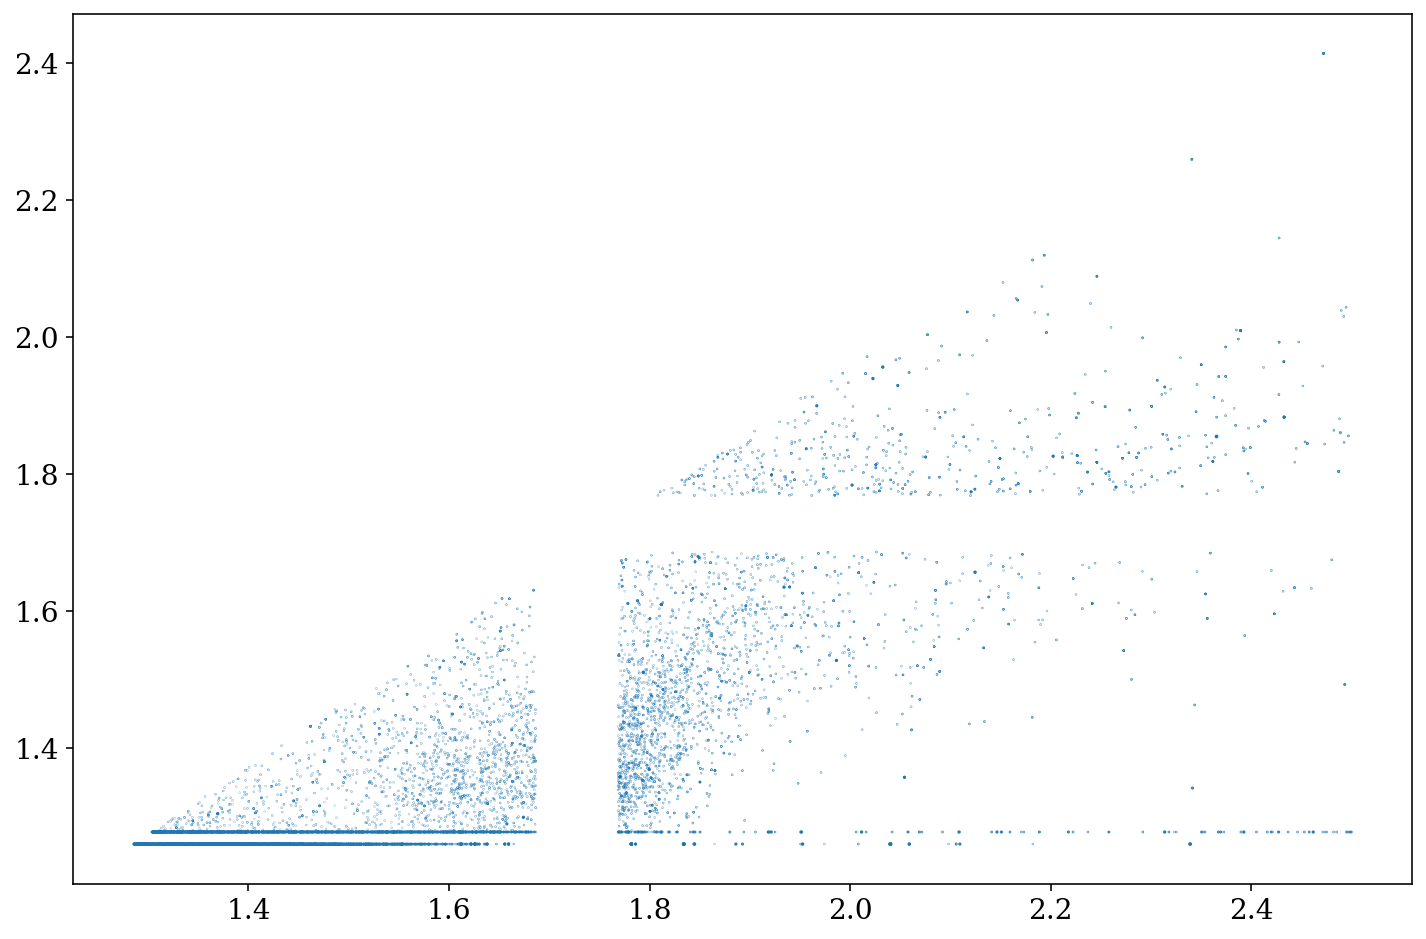

In [108]:
not_equal = q < 0.98
plt.scatter(m_1[not_equal], m_2[not_equal], s=data["weight"][not_equal])

In [116]:
# fraction of systems with m_2 in one of the pileups
np.sum(data["weight"][not_equal][np.logical_or(m_2[not_equal].round(2) == 1.26, m_2[not_equal].round(2) == 1.28)]) / np.sum(data["weight"][not_equal])

0.6752654942874364